# The House Price Prediction Problem

The Problem is to find the Prices of the houses in King Country. So the Target variable here is Price.

# Importing the required libraries

In [1]:
# # Importing the required libraries
import numpy as np
import pandas as pd

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

# Reading the Data

In [2]:
# Set the working directory and reading the data
import os
os.chdir(r"C:/Users/neha/Desktop/Project dataset")
KC_House_Prices = pd.read_csv('wk3_kc_house_train_data.csv')
KC_House_Prices.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1230000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...      7        1050            910   
1    101930     1.0           0     0  ...     11        3890           1530   
2      6000     1.0           0     0  ...      7         860            300   
3     19901     1.5           0     0  ...      7        1430              0   
4      9680     1.0           0     0  ...      7        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  
0        5000  
1      101930  
2        6000  
3       12697  
4       10208  

[5 rows x 21 columns]

# Step -1 : Questioning the Data

In [3]:
# Finding the  No.of columns and rows present in data .

KC_House_Prices.shape     # 9761 rows and 21 columns

(9761, 21)

In [4]:
# Finding the info of data like data type of columns, column names etc

KC_House_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [5]:
KC_House_Prices.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Description of each Feature

**id**:      Unique ID for each home sold<br>
**date**:    Date of the home sale<br>
**price**:   Price of each home sold<br>
**bedrooms**:     Number of bedrooms<br>
**bathrooms**:    Number of bathrooms<br>
**sqft_living**:  Square footage of the apartments interior living space<br>
**sqft_lot**:     Square footage of the land space<br>
**floors**:       Number of floors<br>
**waterfront**: - A variable for whether the apartment was overlooking the waterfront or not<br>
**view**:         An index of how good the view of the property was<br>
**condition**: -  An index on the condition of the apartment<br>
**grade**:        An index on grade og the appartment with 13 being highest and 1 being lowest.<br>
**sqft_above**:       The square footage of the interior housing space that is above ground level<br>
**sqft_basement**:    The square footage of the interior housing space that is below ground level<br>
**yr_built**:         The year the house was initially built<br>
**yr_renovated****:     The year of the house’s last renovation<br>
**zipcode**:          What zipcode area the house is in<br>
**lat**:              Lattitude<br>
**long**:             Longitude<br>
**sqft_living15**:    The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15**:       The square footage of the land lots of the nearest 15 neighbors<br>

In [6]:
# Checking for Null Values
pd.DataFrame(KC_House_Prices.isnull().sum())

# The data has no null values

0
id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
sqft_above     0
sqft_basement  0
yr_built       0
yr_renovated   0
zipcode        0
lat            0
long           0
sqft_living15  0
sqft_lot15     0

In [7]:
# Checking for Duplicate data

duplicates = KC_House_Prices.duplicated()
duplicates.sum()

# here there are no dulicate values

0

In [8]:
# Finding the Summary of Data  like mean, median,standard deviation etc.
KC_House_Prices.describe().transpose()

count          mean           std           min           25%  \
id             9761.0  4.605288e+09  2.876044e+09  1.200019e+06  2.126049e+09   
price          9761.0  5.428336e+05  3.797779e+05  8.000000e+04  3.200000e+05   
bedrooms       9761.0  3.375884e+00  9.606971e-01  0.000000e+00  3.000000e+00   
bathrooms      9761.0  2.117175e+00  7.739710e-01  0.000000e+00  1.750000e+00   
sqft_living    9761.0  2.086734e+03  9.271943e+02  2.900000e+02  1.420000e+03   
sqft_lot       9761.0  1.521526e+04  4.126673e+04  5.200000e+02  5.100000e+03   
floors         9761.0  1.486067e+00  5.323168e-01  1.000000e+00  1.000000e+00   
waterfront     9761.0  8.400779e-03  9.127464e-02  0.000000e+00  0.000000e+00   
view           9761.0  2.480279e-01  7.878772e-01  0.000000e+00  0.000000e+00   
condition      9761.0  3.415531e+00  6.505519e-01  1.000000e+00  3.000000e+00   
grade          9761.0  7.661510e+00  1.182680e+00  1.000000e+00  7.000000e+00   
sqft_above     9761.0  1.793291e+03  8.357638e+02  2.900000e+02  1.190000e+03   
sqft_basement  9761.0  2.934430e+02  4.426127e+02  0.000000e+00  0.000000e+00   
yr_built       9761.0  1.970800e+03  2.924001e+01  1.900000e+03  1.951000e+03   
yr_renovated   9761.0  8.606659e+01  4.054174e+02  0.000000e+00  0.000000e+00   
zipcode        9761.0  9.807779e+04  5.320359e+01  9.800100e+04  9.803300e+04   
lat            9761.0  4.756005e+01  1.402359e-01  4.715590e+01  4.746780e+01   
long           9761.0 -1.222143e+02  1.398945e-01 -1.225140e+02 -1.223270e+02   
sqft_living15  9761.0  1.992360e+03  6.873222e+02  6.200000e+02  1.490000e+03   
sqft_lot15     9761.0  1.282479e+04  2.651834e+04  6.600000e+02  5.160000e+03   

                        50%           75%           max  
id             3.905041e+09  7.338403e+09  9.900000e+09  
price          4.500000e+05  6.490000e+05  7.700000e+06  
bedrooms       3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.910000e+03  2.570000e+03  1.205000e+04  
sqft_lot       7.642000e+03  1.066000e+04  1.651359e+06  
floors         1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.570000e+03  2.230000e+03  8.860000e+03  
sqft_basement  0.000000e+00  5.700000e+02  3.480000e+03  
yr_built       1.975000e+03  1.996000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.806500e+04  9.811700e+04  9.819900e+04  
lat            4.757220e+01  4.768040e+01  4.777760e+01  
long          -1.222290e+02 -1.221260e+02 -1.213190e+02  
sqft_living15  1.840000e+03  2.370000e+03  5.790000e+03  
sqft_lot15     7.660000e+03  1.011300e+04  5.606170e+05

# Hypothesis based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

# Correlating :
We want to know how well does each feature correlate with Price (target variable) which gives a rough idea about which features are more effecting the target.In general business sense we can say that sqft_living, sqft_above, bedrooms, bathrooms, grade, yr_built highly determines the value of the house.

# Completing
Since there are no missing values we do not need to complete any values.

# Correcting
1. Id, Date features may be dropped from our analysis since it does not add much value. Date feature may be dropped.There may be a chance that the prices data have skewness as the values are present in wide range.
2. Some of the categorical columns like view, waterfront, condition, grade are treated as dataype int. But they can be converted to a object data type.
# Creating :
We may want to create a new feature called Age based on yr_built to analyze the price change based on Age of the House.

In [9]:
# From the above data we can remove the ID and Date columns because in general the ID column doesn't effect the price of the house much
# and also the date of sale also doesn't effect much, but only the year of built effect, so dropping ID and date columns

# Droping the ID column and DAte columns

KC_House_Prices = KC_House_Prices.drop(columns = ['id','date'])
KC_House_Prices.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   604000.0         4       3.00         1960      5000     1.0           0   
1  1230000.0         4       4.50         5420    101930     1.0           0   
2   468000.0         2       1.00         1160      6000     1.0           0   
3   310000.0         3       1.00         1430     19901     1.5           0   
4   400000.0         3       1.75         1370      9680     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          5      7        1050            910      1965             0   
1     0          3     11        3890           1530      2001             0   
2     0          4      7         860            300      1942             0   
3     0          4      7        1430              0      1927             0   
4     0          4      7        1370              0      1977             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98136  47.5208 -122.393           1360        5000  
1    98053  47.6561 -122.005           4760      101930  
2    98115  47.6900 -122.292           1330        6000  
3    98028  47.7558 -122.229           1780       12697  
4    98074  47.6127 -122.045           1370       10208

In [10]:
# Finding the Summary of Data  like mean, median,standard deviation etc.
KC_House_Prices.describe().transpose()

count           mean            std         min          25%  \
price          9761.0  542833.586006  379777.949935  80000.0000  320000.0000   
bedrooms       9761.0       3.375884       0.960697      0.0000       3.0000   
bathrooms      9761.0       2.117175       0.773971      0.0000       1.7500   
sqft_living    9761.0    2086.734146     927.194303    290.0000    1420.0000   
sqft_lot       9761.0   15215.260629   41266.734598    520.0000    5100.0000   
floors         9761.0       1.486067       0.532317      1.0000       1.0000   
waterfront     9761.0       0.008401       0.091275      0.0000       0.0000   
view           9761.0       0.248028       0.787877      0.0000       0.0000   
condition      9761.0       3.415531       0.650552      1.0000       3.0000   
grade          9761.0       7.661510       1.182680      1.0000       7.0000   
sqft_above     9761.0    1793.291159     835.763817    290.0000    1190.0000   
sqft_basement  9761.0     293.442987     442.612722      0.0000       0.0000   
yr_built       9761.0    1970.799508      29.240009   1900.0000    1951.0000   
yr_renovated   9761.0      86.066592     405.417369      0.0000       0.0000   
zipcode        9761.0   98077.790185      53.203594  98001.0000   98033.0000   
lat            9761.0      47.560052       0.140236     47.1559      47.4678   
long           9761.0    -122.214322       0.139895   -122.5140    -122.3270   
sqft_living15  9761.0    1992.359697     687.322247    620.0000    1490.0000   
sqft_lot15     9761.0   12824.785165   26518.337402    660.0000    5160.0000   

                       50%          75%           max  
price          450000.0000  649000.0000  7.700000e+06  
bedrooms            3.0000       4.0000  3.300000e+01  
bathrooms           2.2500       2.5000  8.000000e+00  
sqft_living      1910.0000    2570.0000  1.205000e+04  
sqft_lot         7642.0000   10660.0000  1.651359e+06  
floors              1.5000       2.0000  3.500000e+00  
waterfront          0.0000       0.0000  1.000000e+00  
view                0.0000       0.0000  4.000000e+00  
condition           3.0000       4.0000  5.000000e+00  
grade               7.0000       8.0000  1.300000e+01  
sqft_above       1570.0000    2230.0000  8.860000e+03  
sqft_basement       0.0000     570.0000  3.480000e+03  
yr_built         1975.0000    1996.0000  2.015000e+03  
yr_renovated        0.0000       0.0000  2.015000e+03  
zipcode         98065.0000   98117.0000  9.819900e+04  
lat                47.5722      47.6804  4.777760e+01  
long             -122.2290    -122.1260 -1.213190e+02  
sqft_living15    1840.0000    2370.0000  5.790000e+03  
sqft_lot15       7660.0000   10113.0000  5.606170e+05

In [11]:
# Checking for Duplicate data

duplicates = KC_House_Prices.duplicated()
duplicates.sum()

# here there are no dulicate values

1

In [12]:
# Here there is one duplicate value , so dropping the duplicate value

KC_House_Prices = KC_House_Prices.drop_duplicates()
KC_House_Prices.shape                                 # Here 9761 rows became 9760

(9760, 19)

# Step -2 Exploratory Data Analysis

# Checking for Linear Realtionship.

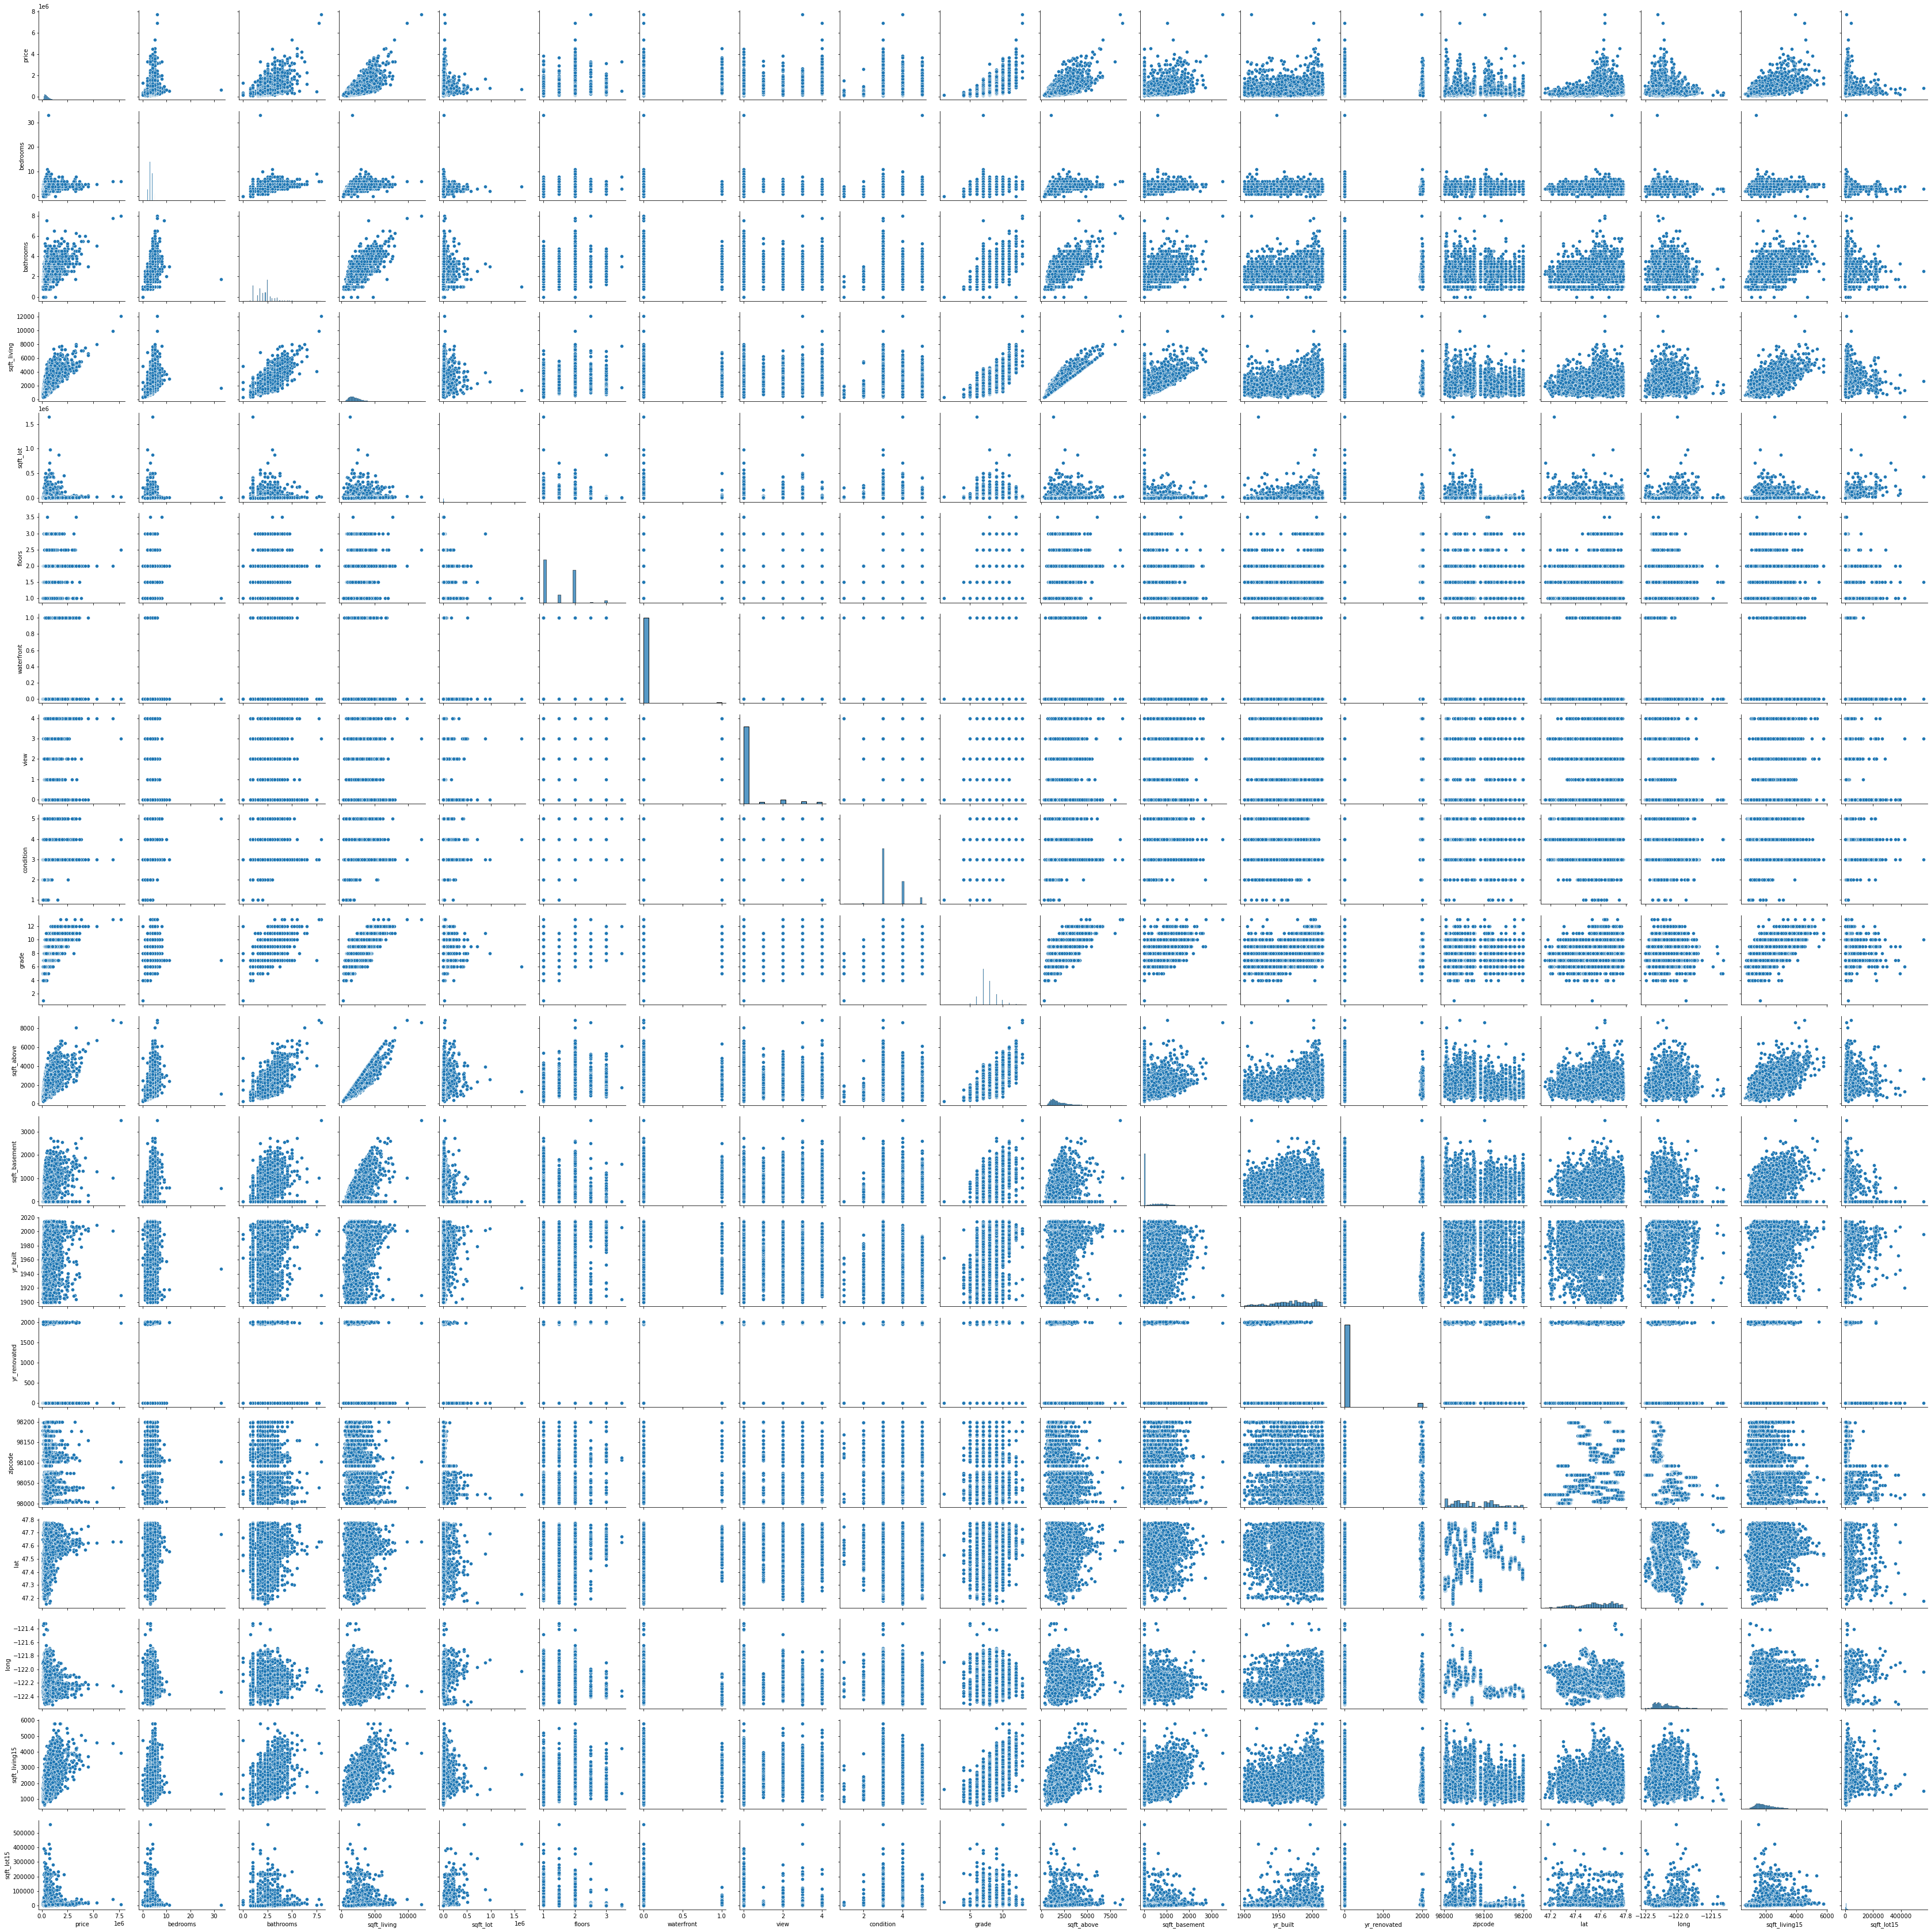

In [13]:
# Pairplot to understand the relationship between varibales in the data 
sns.pairplot(KC_House_Prices)

# Insights

1. There are linear relationships between variables like price, sqft_living, sqft_above, bedrooms, bathrooms etc. 

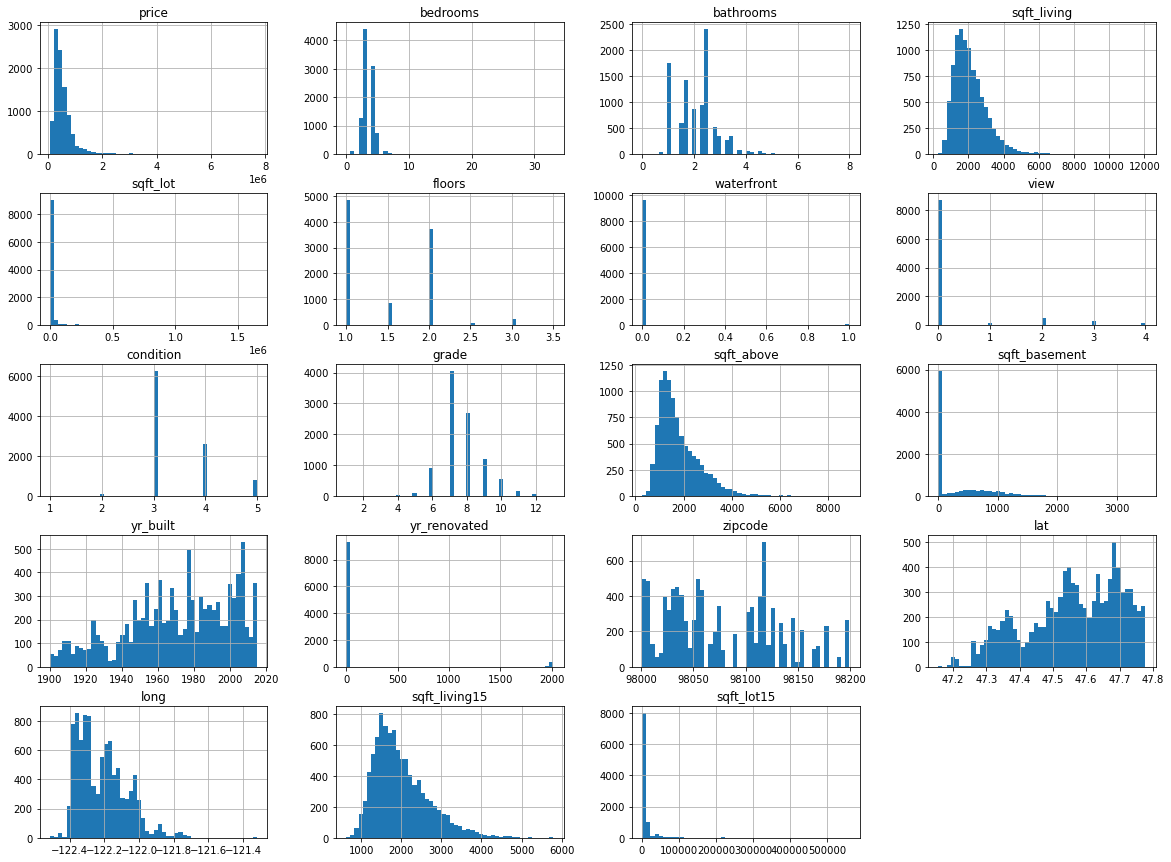

In [14]:
# Plotting a histogram to verify the distributions of the each feature(column) in data.

import matplotlib.pyplot as plt
KC_House_Prices.hist(bins=50, figsize=(20,15))
plt.show()

# Some of features are Categorical and some are Numerical

<AxesSubplot:title={'center':'Correlation Matrix'}>

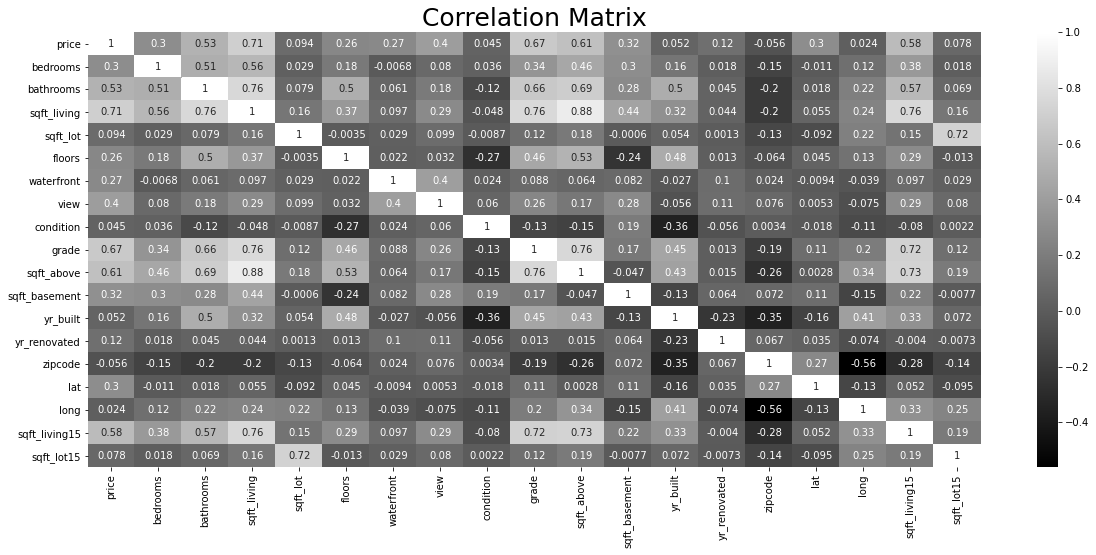

In [15]:
# Finding the correlations between the features using Correlation matrix or heat map

plt.figure(figsize=(20,8))
plt.title("Correlation Matrix",fontsize = 25)

sns.heatmap(KC_House_Prices.corr(),cmap='gray',annot=True)

# Data type Handling

We Noticed that the following columns can be categorical but the datatype of this colmns are int in the dataset.
1. view
2. waterfront
3. condition
4. grade

In [16]:
# Converting datatype into datatype:object where column is mentioned as int but actually they can be categorical in nature.

KC_House_Prices['view']=KC_House_Prices['view'].astype('object')

KC_House_Prices['waterfront']=KC_House_Prices['waterfront'].astype('object')

KC_House_Prices['condition']=KC_House_Prices['condition'].astype('object')

KC_House_Prices['grade']=KC_House_Prices['grade'].astype('object')


In [17]:
# Verifying the data types after conversion
KC_House_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9760 entries, 0 to 9760
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9760 non-null   float64
 1   bedrooms       9760 non-null   int64  
 2   bathrooms      9760 non-null   float64
 3   sqft_living    9760 non-null   int64  
 4   sqft_lot       9760 non-null   int64  
 5   floors         9760 non-null   float64
 6   waterfront     9760 non-null   object 
 7   view           9760 non-null   object 
 8   condition      9760 non-null   object 
 9   grade          9760 non-null   object 
 10  sqft_above     9760 non-null   int64  
 11  sqft_basement  9760 non-null   int64  
 12  yr_built       9760 non-null   int64  
 13  yr_renovated   9760 non-null   int64  
 14  zipcode        9760 non-null   int64  
 15  lat            9760 non-null   float64
 16  long           9760 non-null   float64
 17  sqft_living15  9760 non-null   int64  
 18  sqft_lot

# Univariate Analysis

 Here the Categorical columns are view, condition, grade and waterfront.

# Univriate Analysis of Categorical Variables 

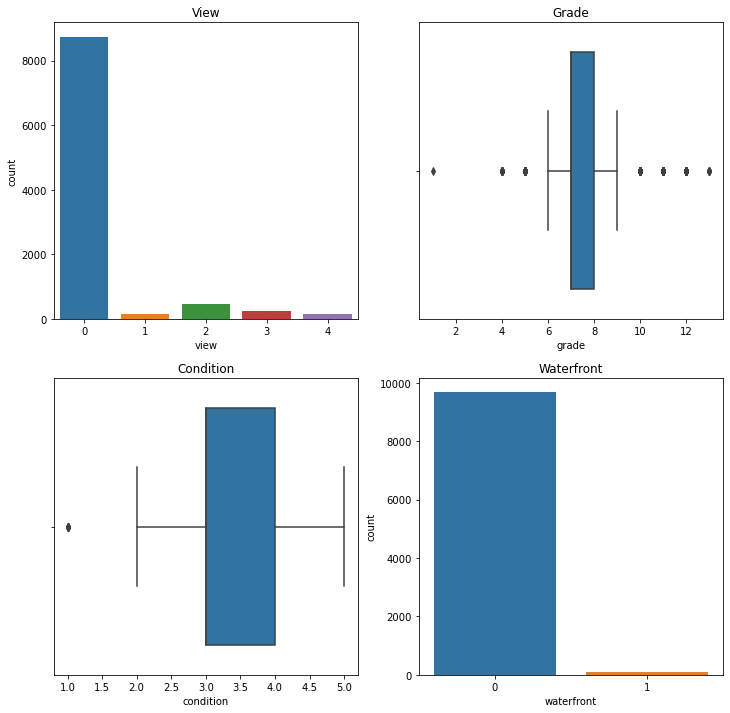

In [18]:

# Presetting the figure size
plt.figure(figsize=(12,12))

# Univriate Analysis of View
plt.subplot(2,2,1)
plt.title('View')
sns.countplot('view',data = KC_House_Prices)   # Analyzed using countplot

# Univriate Analysis of Grade
plt.subplot(2,2,2)
plt.title('Grade')
sns.boxplot('grade',data = KC_House_Prices)   # analysed using boxplot

# Univriate Analysis of Condition
plt.subplot(2,2,3)
plt.title('Condition')
sns.boxplot('condition',data = KC_House_Prices)   # Analyzed using boxplot

# Univriate Analysis of Waterfront
plt.subplot(2,2,4)
plt.title('Waterfront')
sns.countplot('waterfront',data = KC_House_Prices)   #Analyzed using countplot

plt.show()

# Insights

**view** : An index from 0 to 4 of how good the view of the property was. Here most of the houses have value 0.

**Grade** : An index from 1 to 13. It can be observed that most grades of houses are between 6 and 8.5 , with 13 being highest.
    
**Condition** : An index from 1 to 5 on the condition of house. It can be observed that most conditions varies between 2 and 5.
    
**Watrefront**: It can be observed that most of the houses are not overlooking the waterfront.


# Univriate Analysis of Nominal Variables 

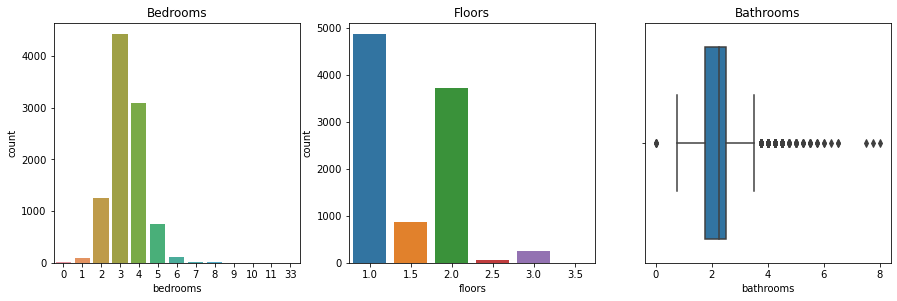

In [19]:
# Presetting the figure size
plt.figure(figsize=(15,15))

# Univriate Analysis of Bedrooms
plt.subplot(3,3,1)
plt.title('Bedrooms')
sns.countplot('bedrooms',data = KC_House_Prices)   # Analyzed using countplot

# Univriate Analysis of Floors
plt.subplot(3,3,2)
plt.title('Floors')
sns.countplot('floors',data = KC_House_Prices)   # analysed using countplot

# Univriate Analysis of Bathrooms
plt.subplot(3,3,3)
plt.title('Bathrooms')
sns.boxplot('bathrooms',data = KC_House_Prices)   # Analyzed using box plot

plt.show()

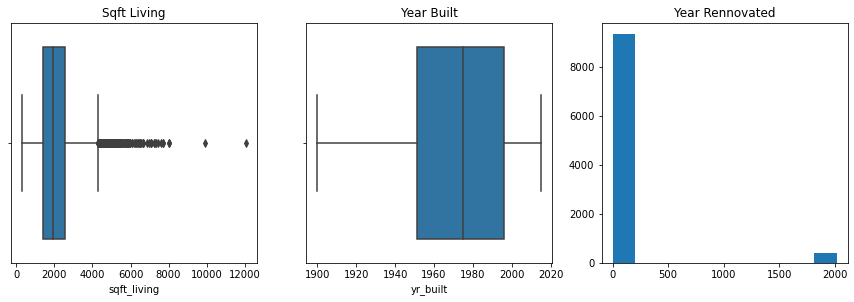

In [20]:
# Univriate Analysis of Sqft_Living

# Presetting the figure size
plt.figure(figsize=(15,15))

plt.subplot(3,3,4)
plt.title('Sqft Living')
sns.boxplot('sqft_living',data = KC_House_Prices)   #Analyzed using boxplot

# Univriate Analysis of Yr_built
plt.subplot(3,3,5)
plt.title('Year Built')
sns.boxplot('yr_built',data = KC_House_Prices)   #Analyzed using boxplot

# Univriate Analysis of Yr_rennovated
plt.subplot(3,3,6)
plt.title('Year Rennovated')
#sns.barplot('yr_renovated',data = KC_House_Prices)
plt.hist(KC_House_Prices.yr_renovated)

plt.show()

<AxesSubplot:title={'center':'sqft_lot'}, xlabel='sqft_lot'>

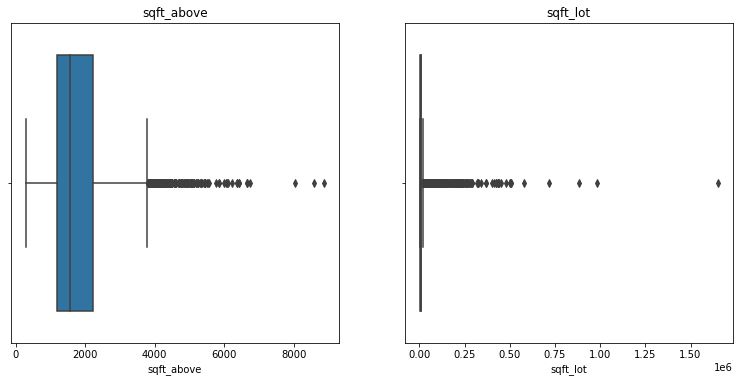

In [21]:
# Presetting the figure size
plt.figure(figsize=(20,20))
plt.subplot(3,3,7)
plt.title('sqft_above')
sns.boxplot('sqft_above',data = KC_House_Prices) 

plt.subplot(3,3,8)
plt.title('sqft_lot')
sns.boxplot('sqft_lot',data = KC_House_Prices)  
  

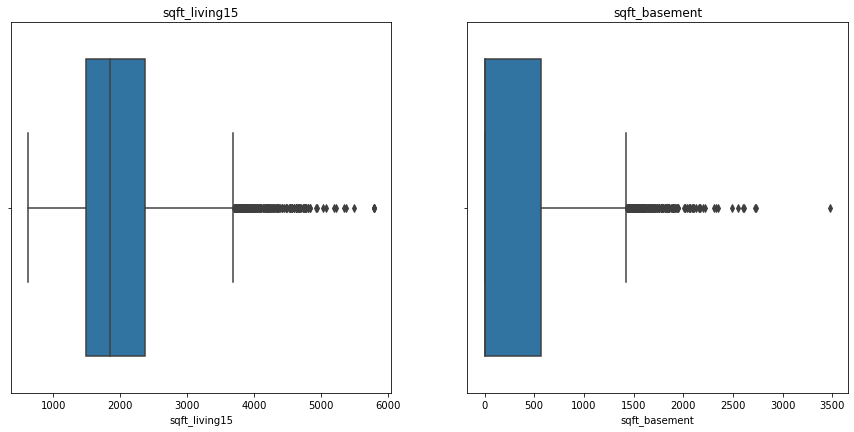

In [22]:

# Presetting the figure size
plt.figure(figsize=(15,15))

# Univriate Analysis of Floors
plt.subplot(2,2,1)
plt.title('sqft_living15')
sns.boxplot('sqft_living15',data = KC_House_Prices)   # analysed using boxplot

plt.subplot(2,2,2)
plt.title('sqft_basement')
sns.boxplot('sqft_basement',data = KC_House_Prices)   # Analyzed using boxplot


plt.show()

# Insights

1. For the column **sqft_living**, **sqft_lot**, **sqft_living**, **sqft_basement**, **sqft_above** there are many outliers. So they have to be treated using feature transformations like Log transformation, square root transformation etc.

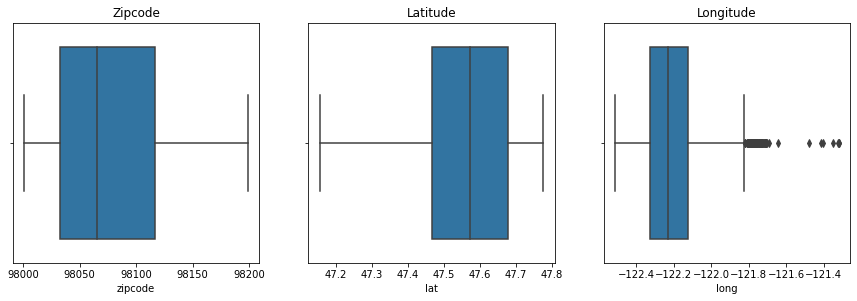

In [23]:
# Univriate Analysis of zipcode

# Presetting the figure size
plt.figure(figsize=(15,15))

plt.subplot(3,3,7)
plt.title('Zipcode')
sns.boxplot('zipcode',data = KC_House_Prices)   #Analyzed using boxplot

# Univriate Analysis of Latitude
plt.subplot(3,3,8)
plt.title('Latitude')
sns.boxplot('lat',data = KC_House_Prices)   #Analyzed using boxplot

# Univriate Analysis of longitude
plt.subplot(3,3,9)
plt.title('Longitude')
sns.boxplot('long',data = KC_House_Prices)   #Analyzed using boxplot

plt.show()

[Text(0.5, 0, 'Price in Millions'), Text(0.5, 1.0, 'Price Distribution')]

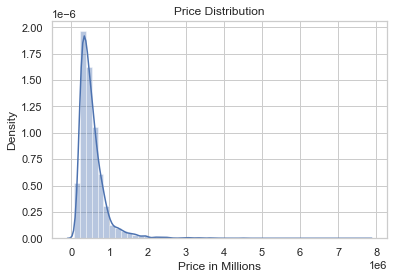

In [24]:
# Distplot to see the distribution of prices of the houses in the data

sns.set(style="whitegrid")
dist_plot = sns.distplot(KC_House_Prices['price'])   
dist_plot.set(xlabel = "Price in Millions" , title = "Price Distribution")          # Labelling X-axis

# Insights
The distribution of Prices is Right skewed beacuse of presence of outliers. So our hypothesis about the price column is true.To handle the skewness target transformations can be done.

# Multivariate Analysis

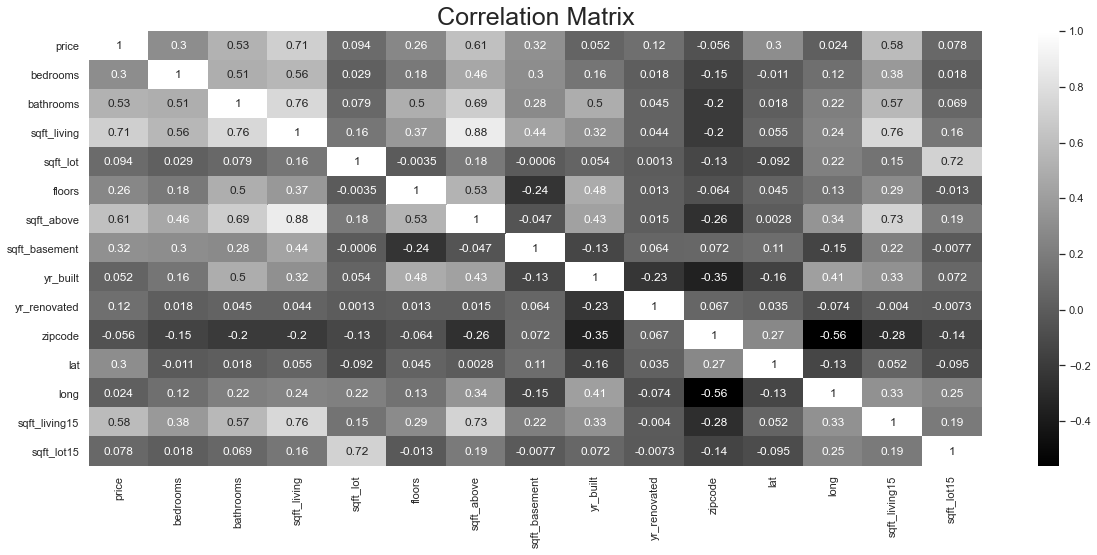

In [25]:
# Understanding correlations between variables 
# This is done after checking the Multi collinearity.

plt.figure(figsize=(20,8))
plt.title("Correlation Matrix",fontsize = 25)
sns.heatmap(KC_House_Prices.corr(),cmap='gray',annot=True)
plt.show()

# Insights from Multivariate Analysis using Heatmap

Here We can Observe some realtions between multiple features like :<br>

    1.sqft_living and price are highly possitively correlated.<br>
    2.bathrooms and price are also highly possitively correlated.<br>
    3.price and zipcode are negatively correlated.<br>
    4.zipcode and longitude are highly negatively correlated.<br>

# Price Correlation 

Here as the Target variable is Price, we will find the features which are highly correlated to Price

In [26]:
price_corr = KC_House_Prices.corr()['price']
print(price_corr.sort_values(ascending = False))    # Sorting the correlation values in descending order.

price            1.000000
sqft_living      0.705047
sqft_above       0.611453
sqft_living15    0.584846
bathrooms        0.527519
sqft_basement    0.322369
bedrooms         0.300783
lat              0.299196
floors           0.262966
yr_renovated     0.120565
sqft_lot         0.094146
sqft_lot15       0.077960
yr_built         0.051743
long             0.023717
zipcode         -0.055619
Name: price, dtype: float64


# Inference

Here zipcode is less and negatively correlated to price which is against to our hypothesis.

# Top Correlations of Price 

# Correlation between Price and sqft_living 

[Text(0.5, 0, 'Price in Millions'), Text(0, 0.5, 'Living Space Area in sqft')]

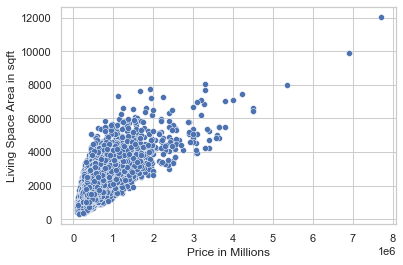

In [27]:
# Correlation between Price and sqft_living 
# Plotting a scatter plot to visualize the correlation

# Using Seaborn to plot the scatter plot
sns.set(style="whitegrid", font_scale=1)
scatter_plot = sns.scatterplot(x = KC_House_Prices.price , y = KC_House_Prices.sqft_living)
scatter_plot.set(xlabel = 'Price in Millions' , ylabel = 'Living Space Area in sqft')

# Insights

The price and sqft_living are highly and possitively correlated. So as The Living arra increases price also increases.
So sqft_living is a very important feature in determining the price of a house. 

Here we can see that most of the Living area is concentrated between 2000 sqft and 6000 sqft with a price range of 0.8 Million  to 2.5 Million dollars

But there are outliers like houses with area of 12,000 sqft with price of $ 8 Million .

# Correlation between Price and Grade

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price in Millions'),
 Text(0.5, 1.0, 'Grade vs Price')]

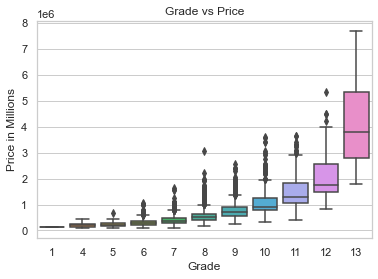

In [28]:
# As the Grade is an Interval Scale data Plotting the Box Plot 
# Here Box plot can give the Measures like mean, median , standard deviation etc and also gives outliers if present.

sns.set(style="whitegrid", font_scale=1)            # Setting the back ground style of the plot
bedrooms_box_plot = sns.boxplot(x = KC_House_Prices.grade , y = KC_House_Prices.price)
bedrooms_box_plot.set(xlabel = 'Grade', ylabel = 'Price in Millions', title = 'Grade vs Price')

# Insights

Here the Price of a house and grade of a house are highly and possitively correlated. 
As the Grade of the house increases the price of the house incerases.
Here we can intrepret that there are some outliers for each grade category
Ex : For grade 10, the price of houses are mostly concentrated around $ 0.9 M to $ 1.3 M.

#  Correlation between Price and No.of Bedrooms

[Text(0.5, 0, 'No.of Bedrooms'),
 Text(0, 0.5, 'Price in Millions'),
 Text(0.5, 1.0, 'Bedrooms vs Price')]

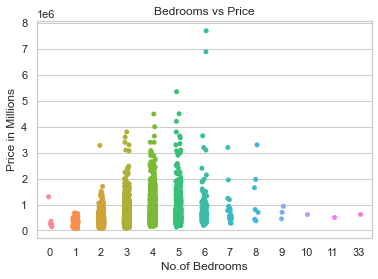

In [29]:
# Using Seaborn to plot the Strip plot
sns.set(style="whitegrid", font_scale=1)
strip_plot = sns.stripplot(x = KC_House_Prices.bedrooms , y = KC_House_Prices.price)
strip_plot.set(xlabel = 'No.of Bedrooms' , ylabel = 'Price in Millions' , title = 'Bedrooms vs Price')

# Insights

Here the Price of a house and no.of bedrooms of a house are possitively correlated. 
Also we can see that someprices of houses with more bedrooms are more. This is because of effect of other factors line living area, zipcode etc 

# Defining Target Variable

In [30]:
Target_T = KC_House_Prices.price
Target_T.shape

(9760,)

# Defining Predictors

In [31]:
Predictors_T = KC_House_Prices.drop(columns=['price'])
Predictors_T

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0            4       3.00         1960      5000     1.0          0    0   
1            4       4.50         5420    101930     1.0          0    0   
2            2       1.00         1160      6000     1.0          0    0   
3            3       1.00         1430     19901     1.5          0    0   
4            3       1.75         1370      9680     1.0          0    0   
...        ...        ...          ...       ...     ...        ...  ...   
9756         3       2.00         1490      1126     3.0          0    0   
9757         4       2.50         2520      6023     2.0          0    0   
9758         4       3.50         3510      7200     2.0          0    0   
9759         2       0.75         1020      1350     2.0          0    0   
9760         2       0.75         1020      1076     2.0          0    0   

     condition grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0            5     7        1050            910      1965             0   
1            3    11        3890           1530      2001             0   
2            4     7         860            300      1942             0   
3            4     7        1430              0      1927             0   
4            4     7        1370              0      1977             0   
...        ...   ...         ...            ...       ...           ...   
9756         3     8        1490              0      2014             0   
9757         3     9        2520              0      2014             0   
9758         3     9        2600            910      2009             0   
9759         3     7        1020              0      2009             0   
9760         3     7        1020              0      2008             0   

      zipcode      lat     long  sqft_living15  sqft_lot15  
0       98136  47.5208 -122.393           1360        5000  
1       98053  47.6561 -122.005           4760      101930  
2       98115  47.6900 -122.292           1330        6000  
3       98028  47.7558 -122.229           1780       12697  
4       98074  47.6127 -122.045           1370       10208  
...       ...      ...      ...            ...         ...  
9756    98144  47.5699 -122.288           1400        1230  
9757    98056  47.5137 -122.167           2520        6023  
9758    98136  47.5537 -122.398           2050        6200  
9759    98144  47.5944 -122.299           1020        2007  
9760    98144  47.5941 -122.299           1020        1357  

[9760 rows x 18 columns]

# step -3 : Initial Model fitting

First Choosing all the predictors to train the data set. Later doing the Statistical analysis we will define the correct set of features to predict the target variable.

# Simple Linear Regression 

In [32]:
# Simple Linear Regression with one predictor sqft_living which is the highest correlated feature.
# Here we use the highest correlated value with the pricesqrt_living 

X = KC_House_Prices[['sqft_living']]
y = KC_House_Prices[['price']]
from sklearn.model_selection import train_test_split     # Splitting the data into train (80%) and test data (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)  # 

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()    # Defining the linear regression model.
lr.fit(X_train, y_train)   # Fitting the model with train data
y_pred = lr.predict(X_test) # Predictiing the model with test data.
lr.coef_                     # Finding the coefficient
 

array([[292.70804415]])

In [34]:
from sklearn import metrics

model_score = lr.score(X_test,y_test)            # Finding the score of the model.
r_square = metrics.r2_score(y_test, y_pred)      # Finding the R2 score  
mse = metrics.mean_squared_error(y_test, y_pred)   # Finding Mean squared error.
mae = metrics.median_absolute_error(y_test, y_pred) # Finding Mean Absolute Error.


print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)


Model Score            :  0.473019198351735
R Square               :  0.473019198351735
Mean Squared Error     :  69668474494.92062
Root Mean Squared Error:  263947.8632134017
Median Absolute Error  :  132380.25315636597


# Insights

Here the R squared value which is used to evaluate the model is low. Means the predictor we took for this model is not sufficient to predict the target (price) and have to take more predictors in evaluating the target.

# Multiple Linear Regression

In [35]:
# Here we use all the predictors present.

X = Predictors_T
y = KC_House_Prices[['price']]
from sklearn.model_selection import train_test_split      # Splitting the data into train (80%) and test data (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()    # Defining the linear regression model.
lr.fit(X_train, y_train)    # Fitting the model with train data
y_pred = lr.predict(X_test)    # Applying model on test data.
 

In [37]:
from sklearn import metrics

model_score = lr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)


print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)


Model Score            :  0.7071440219014455
R Square               :  0.7071440219014455
Mean Squared Error     :  38716456419.3405
Root Mean Squared Error:  196764.97762391684
Median Absolute Error  :  92979.74955510441


When compared to simple linear Regression, the R squared score increased. But it can still be more because there may be predictors which are highly correlated to each other other than to target variable effecting the model's performance or the data might have been overfitted to the model. So to overcome this problem we do K-fold Cross Validation.

# K-Fold Cross Validation 

In [38]:
#  10 Fold Cross Validation

# https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(LinearRegression(), Predictors_T, Target_T,cv= 10)  # Ding 10 fold cross validation using linear
Mean_score = scores.mean()                                                    # regression model and taking the mean score.
print("The Accuracy of the Model with cross Validation is : " ,Mean_score)

The Accuracy of the Model with cross Validation is :  0.6919001158575488


By loooking at the cross validation we can conclude that the model befor this cross validation has data overfitting problem.
So this is addressed by 10 - fold cross validation which is generally an industry stabdard validation technique. Over fitting might also occur because of high correlation among the predictors. This can be solved by doing feature engineering,statistical analysis etc

# Step 4 - Feature Engineering

Goals :
Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
Improving the performance of machine learning models.

List of Techniques

1.Imputation<br>
2.Handling Outliers<br>
3.Binning<br>
4.Log Transform<br>
5.One-Hot Encoding<br>
6.Grouping Operations<br>
7.Feature Split<br>
8.Scaling<br>
9.Extracting Date<br>

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#3abe

In [39]:
KC_House_Prices

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      604000.0         4       3.00         1960      5000     1.0   
1     1230000.0         4       4.50         5420    101930     1.0   
2      468000.0         2       1.00         1160      6000     1.0   
3      310000.0         3       1.00         1430     19901     1.5   
4      400000.0         3       1.75         1370      9680     1.0   
...         ...       ...        ...          ...       ...     ...   
9756   429000.0         3       2.00         1490      1126     3.0   
9757   610685.0         4       2.50         2520      6023     2.0   
9758  1010000.0         4       3.50         3510      7200     2.0   
9759   402101.0         2       0.75         1020      1350     2.0   
9760   325000.0         2       0.75         1020      1076     2.0   

     waterfront view condition grade  sqft_above  sqft_basement  yr_built  \
0             0    0         5     7        1050            910      1965   
1             0    0         3    11        3890           1530      2001   
2             0    0         4     7         860            300      1942   
3             0    0         4     7        1430              0      1927   
4             0    0         4     7        1370              0      1977   
...         ...  ...       ...   ...         ...            ...       ...   
9756          0    0         3     8        1490              0      2014   
9757          0    0         3     9        2520              0      2014   
9758          0    0         3     9        2600            910      2009   
9759          0    0         3     7        1020              0      2009   
9760          0    0         3     7        1020              0      2008   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0                0    98136  47.5208 -122.393           1360        5000  
1                0    98053  47.6561 -122.005           4760      101930  
2                0    98115  47.6900 -122.292           1330        6000  
3                0    98028  47.7558 -122.229           1780       12697  
4                0    98074  47.6127 -122.045           1370       10208  
...            ...      ...      ...      ...            ...         ...  
9756             0    98144  47.5699 -122.288           1400        1230  
9757             0    98056  47.5137 -122.167           2520        6023  
9758             0    98136  47.5537 -122.398           2050        6200  
9759             0    98144  47.5944 -122.299           1020        2007  
9760             0    98144  47.5941 -122.299           1020        1357  

[9760 rows x 19 columns]

# Bining Grade column

In [41]:

# Function to convert grade column column.
def func_grade(x):
    if x <= 4:
        return 'Low'                # Conditions given as Low, High,Medium based on grade values.
    elif x <= 9:
        return 'Medium'
    elif x <= 13:
        return 'High'

In [42]:
# Applying the above function on grade column

KC_House_Prices['grade'] = KC_House_Prices['grade'].apply(func_grade)

KC_House_Prices.head(10)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0   604000.0         4       3.00         1960      5000     1.0          0   
1  1230000.0         4       4.50         5420    101930     1.0          0   
2   468000.0         2       1.00         1160      6000     1.0          0   
3   310000.0         3       1.00         1430     19901     1.5          0   
4   400000.0         3       1.75         1370      9680     1.0          0   
5   650000.0         4       3.00         2950      5000     2.0          0   
6   485000.0         4       1.00         1600      4300     1.5          0   
7   385000.0         4       1.75         1620      4980     1.0          0   
8   285000.0         5       2.50         2270      6300     2.0          0   
9   252700.0         2       1.50         1070      9643     1.0          0   

  view condition   grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    0         5  Medium        1050            910      1965             0   
1    0         3    High        3890           1530      2001             0   
2    0         4  Medium         860            300      1942             0   
3    0         4  Medium        1430              0      1927             0   
4    0         4  Medium        1370              0      1977             0   
5    3         3  Medium        1980            970      1979             0   
6    0         4  Medium        1600              0      1916             0   
7    0         4  Medium         860            760      1947             0   
8    0         3  Medium        2270              0      1995             0   
9    0         3  Medium        1070              0      1985             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98136  47.5208 -122.393           1360        5000  
1    98053  47.6561 -122.005           4760      101930  
2    98115  47.6900 -122.292           1330        6000  
3    98028  47.7558 -122.229           1780       12697  
4    98074  47.6127 -122.045           1370       10208  
5    98126  47.5714 -122.375           2140        4000  
6    98103  47.6648 -122.343           1610        4300  
7    98133  47.7025 -122.341           1400        4980  
8    98092  47.3266 -122.169           2240        7005  
9    98030  47.3533 -122.166           1220        8386

# Scaling the Required Non-Categorical data

Generally Scaling is done to compare variables whose units of measurement are different. 

# Applying Log transformation to sqft_living, sqft_above, sqft_living15 etc.

In [43]:
# Applying Log transformation to handle outliers
KC_House_Prices['sqft_living'] = np.log(KC_House_Prices['sqft_living'])
KC_House_Prices['sqft_above'] = np.log(KC_House_Prices['sqft_above'])
KC_House_Prices['sqft_living15'] = np.log(KC_House_Prices['sqft_living15'])
KC_House_Prices['sqft_lot15'] = np.log(KC_House_Prices['sqft_lot15'])
KC_House_Prices['sqft_basement'] = np.log(KC_House_Prices['sqft_basement'])
KC_House_Prices['sqft_lot'] = np.log(KC_House_Prices['sqft_lot'])

In [44]:
KC_House_Prices.sqft_living

0       7.580700
1       8.597851
2       7.056175
3       7.265430
4       7.222566
          ...   
9756    7.306531
9757    7.832014
9758    8.163371
9759    6.927558
9760    6.927558
Name: sqft_living, Length: 9760, dtype: float64

In [45]:
KC_House_Prices.sqft_above

0       6.956545
1       8.266164
2       6.756932
3       7.265430
4       7.222566
          ...   
9756    7.306531
9757    7.832014
9758    7.863267
9759    6.927558
9760    6.927558
Name: sqft_above, Length: 9760, dtype: float64

# Applying MinMax scaling on Zipcode

In [46]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [47]:
KC_House_Prices[['zipcode']]= mm.fit_transform(KC_House_Prices[['zipcode']])
KC_House_Prices.head()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors waterfront  \
0   604000.0         4       3.00     7.580700   8.517193     1.0          0   
1  1230000.0         4       4.50     8.597851  11.532042     1.0          0   
2   468000.0         2       1.00     7.056175   8.699515     1.0          0   
3   310000.0         3       1.00     7.265430   9.898525     1.5          0   
4   400000.0         3       1.75     7.222566   9.177817     1.0          0   

  view condition   grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    0         5  Medium    6.956545       6.813445      1965             0   
1    0         3    High    8.266164       7.333023      2001             0   
2    0         4  Medium    6.756932       5.703782      1942             0   
3    0         4  Medium    7.265430           -inf      1927             0   
4    0         4  Medium    7.222566           -inf      1977             0   

    zipcode      lat     long  sqft_living15  sqft_lot15  
0  0.681818  47.5208 -122.393       7.215240    8.517193  
1  0.262626  47.6561 -122.005       8.468003   11.532042  
2  0.575758  47.6900 -122.292       7.192934    8.699515  
3  0.136364  47.7558 -122.229       7.484369    9.449121  
4  0.368687  47.6127 -122.045       7.222566    9.230927

# Creating Age column 

Creating a new column Age which gives the age of the house. Age is obtained by subtracting yr_built values from present year 2021  and dropping the yr_built column

In [48]:
# Creating Age column  

KC_House_Prices['Age']= 2021 - KC_House_Prices['yr_built']
KC_House_Prices

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
0      604000.0         4       3.00     7.580700   8.517193     1.0   
1     1230000.0         4       4.50     8.597851  11.532042     1.0   
2      468000.0         2       1.00     7.056175   8.699515     1.0   
3      310000.0         3       1.00     7.265430   9.898525     1.5   
4      400000.0         3       1.75     7.222566   9.177817     1.0   
...         ...       ...        ...          ...        ...     ...   
9756   429000.0         3       2.00     7.306531   7.026427     3.0   
9757   610685.0         4       2.50     7.832014   8.703341     2.0   
9758  1010000.0         4       3.50     8.163371   8.881836     2.0   
9759   402101.0         2       0.75     6.927558   7.207860     2.0   
9760   325000.0         2       0.75     6.927558   6.981006     2.0   

     waterfront view condition   grade  sqft_above  sqft_basement  yr_built  \
0             0    0         5  Medium    6.956545       6.813445      1965   
1             0    0         3    High    8.266164       7.333023      2001   
2             0    0         4  Medium    6.756932       5.703782      1942   
3             0    0         4  Medium    7.265430           -inf      1927   
4             0    0         4  Medium    7.222566           -inf      1977   
...         ...  ...       ...     ...         ...            ...       ...   
9756          0    0         3  Medium    7.306531           -inf      2014   
9757          0    0         3  Medium    7.832014           -inf      2014   
9758          0    0         3  Medium    7.863267       6.813445      2009   
9759          0    0         3  Medium    6.927558           -inf      2009   
9760          0    0         3  Medium    6.927558           -inf      2008   

      yr_renovated   zipcode      lat     long  sqft_living15  sqft_lot15  Age  
0                0  0.681818  47.5208 -122.393       7.215240    8.517193   56  
1                0  0.262626  47.6561 -122.005       8.468003   11.532042   20  
2                0  0.575758  47.6900 -122.292       7.192934    8.699515   79  
3                0  0.136364  47.7558 -122.229       7.484369    9.449121   94  
4                0  0.368687  47.6127 -122.045       7.222566    9.230927   44  
...            ...       ...      ...      ...            ...         ...  ...  
9756             0  0.722222  47.5699 -122.288       7.244228    7.114769    7  
9757             0  0.277778  47.5137 -122.167       7.832014    8.703341    7  
9758             0  0.681818  47.5537 -122.398       7.625595    8.732305   12  
9759             0  0.722222  47.5944 -122.299       6.927558    7.604396   12  
9760             0  0.722222  47.5941 -122.299       6.927558    7.213032   13  

[9760 rows x 20 columns]

In [49]:
# Dropping yr_built column as Age Column is created.

KC_House_Prices= KC_House_Prices.drop(columns='yr_built')
KC_House_Prices

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
0      604000.0         4       3.00     7.580700   8.517193     1.0   
1     1230000.0         4       4.50     8.597851  11.532042     1.0   
2      468000.0         2       1.00     7.056175   8.699515     1.0   
3      310000.0         3       1.00     7.265430   9.898525     1.5   
4      400000.0         3       1.75     7.222566   9.177817     1.0   
...         ...       ...        ...          ...        ...     ...   
9756   429000.0         3       2.00     7.306531   7.026427     3.0   
9757   610685.0         4       2.50     7.832014   8.703341     2.0   
9758  1010000.0         4       3.50     8.163371   8.881836     2.0   
9759   402101.0         2       0.75     6.927558   7.207860     2.0   
9760   325000.0         2       0.75     6.927558   6.981006     2.0   

     waterfront view condition   grade  sqft_above  sqft_basement  \
0             0    0         5  Medium    6.956545       6.813445   
1             0    0         3    High    8.266164       7.333023   
2             0    0         4  Medium    6.756932       5.703782   
3             0    0         4  Medium    7.265430           -inf   
4             0    0         4  Medium    7.222566           -inf   
...         ...  ...       ...     ...         ...            ...   
9756          0    0         3  Medium    7.306531           -inf   
9757          0    0         3  Medium    7.832014           -inf   
9758          0    0         3  Medium    7.863267       6.813445   
9759          0    0         3  Medium    6.927558           -inf   
9760          0    0         3  Medium    6.927558           -inf   

      yr_renovated   zipcode      lat     long  sqft_living15  sqft_lot15  Age  
0                0  0.681818  47.5208 -122.393       7.215240    8.517193   56  
1                0  0.262626  47.6561 -122.005       8.468003   11.532042   20  
2                0  0.575758  47.6900 -122.292       7.192934    8.699515   79  
3                0  0.136364  47.7558 -122.229       7.484369    9.449121   94  
4                0  0.368687  47.6127 -122.045       7.222566    9.230927   44  
...            ...       ...      ...      ...            ...         ...  ...  
9756             0  0.722222  47.5699 -122.288       7.244228    7.114769    7  
9757             0  0.277778  47.5137 -122.167       7.832014    8.703341    7  
9758             0  0.681818  47.5537 -122.398       7.625595    8.732305   12  
9759             0  0.722222  47.5944 -122.299       6.927558    7.604396   12  
9760             0  0.722222  47.5941 -122.299       6.927558    7.213032   13  

[9760 rows x 19 columns]

<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

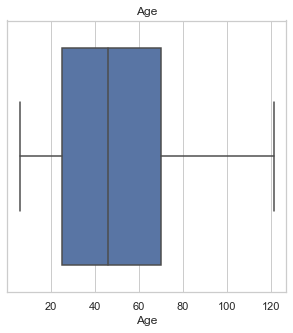

In [50]:
# Analyzing Date Column for outliers using Boxplot

plt.figure(figsize=(5,5))

plt.title('Age')
sns.boxplot('Age',data = KC_House_Prices)   #Analyzed using boxplot


Now All the Non- Categorical Columns are in comparable form

# Feature Transforming the Categorical Columns

**Categorical columns are treated using dummy varibale creation**

**We are using pandas inbuilt method which is get_dummies() method to treat the categorical column.**


In [51]:
Categorical_cloumns = KC_House_Prices[['grade','view','condition','waterfront']]
Categorical_cloumns = pd.get_dummies(Categorical_cloumns, drop_first= True )
Categorical_cloumns

grade_Low  grade_Medium  view_1  view_2  view_3  view_4  condition_2  \
0             0             1       0       0       0       0            0   
1             0             0       0       0       0       0            0   
2             0             1       0       0       0       0            0   
3             0             1       0       0       0       0            0   
4             0             1       0       0       0       0            0   
...         ...           ...     ...     ...     ...     ...          ...   
9756          0             1       0       0       0       0            0   
9757          0             1       0       0       0       0            0   
9758          0             1       0       0       0       0            0   
9759          0             1       0       0       0       0            0   
9760          0             1       0       0       0       0            0   

      condition_3  condition_4  condition_5  waterfront_1  
0               0            0            1             0  
1               1            0            0             0  
2               0            1            0             0  
3               0            1            0             0  
4               0            1            0             0  
...           ...          ...          ...           ...  
9756            1            0            0             0  
9757            1            0            0             0  
9758            1            0            0             0  
9759            1            0            0             0  
9760            1            0            0             0  

[9760 rows x 11 columns]

In [52]:
# Deleting the categorical columns from KC_House_Prices data frame and concatinating the transformed variables again

# KC_House_Prices = KC_House_Prices.drop(Categorical_cloumns,axis=1)
KC_House_Prices.head()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors waterfront  \
0   604000.0         4       3.00     7.580700   8.517193     1.0          0   
1  1230000.0         4       4.50     8.597851  11.532042     1.0          0   
2   468000.0         2       1.00     7.056175   8.699515     1.0          0   
3   310000.0         3       1.00     7.265430   9.898525     1.5          0   
4   400000.0         3       1.75     7.222566   9.177817     1.0          0   

  view condition   grade  sqft_above  sqft_basement  yr_renovated   zipcode  \
0    0         5  Medium    6.956545       6.813445             0  0.681818   
1    0         3    High    8.266164       7.333023             0  0.262626   
2    0         4  Medium    6.756932       5.703782             0  0.575758   
3    0         4  Medium    7.265430           -inf             0  0.136364   
4    0         4  Medium    7.222566           -inf             0  0.368687   

       lat     long  sqft_living15  sqft_lot15  Age  
0  47.5208 -122.393       7.215240    8.517193   56  
1  47.6561 -122.005       8.468003   11.532042   20  
2  47.6900 -122.292       7.192934    8.699515   79  
3  47.7558 -122.229       7.484369    9.449121   94  
4  47.6127 -122.045       7.222566    9.230927   44

In [53]:
KC_House_Prices_F = KC_House_Prices[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Age']]
KC_House_Prices_F

bedrooms  bathrooms  sqft_living   sqft_lot  sqft_basement  \
0            4       3.00     7.580700   8.517193       6.813445   
1            4       4.50     8.597851  11.532042       7.333023   
2            2       1.00     7.056175   8.699515       5.703782   
3            3       1.00     7.265430   9.898525           -inf   
4            3       1.75     7.222566   9.177817           -inf   
...        ...        ...          ...        ...            ...   
9756         3       2.00     7.306531   7.026427           -inf   
9757         4       2.50     7.832014   8.703341           -inf   
9758         4       3.50     8.163371   8.881836       6.813445   
9759         2       0.75     6.927558   7.207860           -inf   
9760         2       0.75     6.927558   6.981006           -inf   

      yr_renovated   zipcode      lat     long  sqft_living15  sqft_lot15  Age  
0                0  0.681818  47.5208 -122.393       7.215240    8.517193   56  
1                0  0.262626  47.6561 -122.005       8.468003   11.532042   20  
2                0  0.575758  47.6900 -122.292       7.192934    8.699515   79  
3                0  0.136364  47.7558 -122.229       7.484369    9.449121   94  
4                0  0.368687  47.6127 -122.045       7.222566    9.230927   44  
...            ...       ...      ...      ...            ...         ...  ...  
9756             0  0.722222  47.5699 -122.288       7.244228    7.114769    7  
9757             0  0.277778  47.5137 -122.167       7.832014    8.703341    7  
9758             0  0.681818  47.5537 -122.398       7.625595    8.732305   12  
9759             0  0.722222  47.5944 -122.299       6.927558    7.604396   12  
9760             0  0.722222  47.5941 -122.299       6.927558    7.213032   13  

[9760 rows x 12 columns]

In [54]:
KC_House_Prices_F = pd.concat([KC_House_Prices_F, Categorical_cloumns], axis= 1)
KC_House_Prices_F

bedrooms  bathrooms  sqft_living   sqft_lot  sqft_basement  \
0            4       3.00     7.580700   8.517193       6.813445   
1            4       4.50     8.597851  11.532042       7.333023   
2            2       1.00     7.056175   8.699515       5.703782   
3            3       1.00     7.265430   9.898525           -inf   
4            3       1.75     7.222566   9.177817           -inf   
...        ...        ...          ...        ...            ...   
9756         3       2.00     7.306531   7.026427           -inf   
9757         4       2.50     7.832014   8.703341           -inf   
9758         4       3.50     8.163371   8.881836       6.813445   
9759         2       0.75     6.927558   7.207860           -inf   
9760         2       0.75     6.927558   6.981006           -inf   

      yr_renovated   zipcode      lat     long  sqft_living15  ...  \
0                0  0.681818  47.5208 -122.393       7.215240  ...   
1                0  0.262626  47.6561 -122.005       8.468003  ...   
2                0  0.575758  47.6900 -122.292       7.192934  ...   
3                0  0.136364  47.7558 -122.229       7.484369  ...   
4                0  0.368687  47.6127 -122.045       7.222566  ...   
...            ...       ...      ...      ...            ...  ...   
9756             0  0.722222  47.5699 -122.288       7.244228  ...   
9757             0  0.277778  47.5137 -122.167       7.832014  ...   
9758             0  0.681818  47.5537 -122.398       7.625595  ...   
9759             0  0.722222  47.5944 -122.299       6.927558  ...   
9760             0  0.722222  47.5941 -122.299       6.927558  ...   

      grade_Medium  view_1  view_2  view_3  view_4  condition_2  condition_3  \
0                1       0       0       0       0            0            0   
1                0       0       0       0       0            0            1   
2                1       0       0       0       0            0            0   
3                1       0       0       0       0            0            0   
4                1       0       0       0       0            0            0   
...            ...     ...     ...     ...     ...          ...          ...   
9756             1       0       0       0       0            0            1   
9757             1       0       0       0       0            0            1   
9758             1       0       0       0       0            0            1   
9759             1       0       0       0       0            0            1   
9760             1       0       0       0       0            0            1   

      condition_4  condition_5  waterfront_1  
0               0            1             0  
1               0            0             0  
2               1            0             0  
3               1            0             0  
4               1            0             0  
...           ...          ...           ...  
9756            0            0             0  
9757            0            0             0  
9758            0            0             0  
9759            0            0             0  
9760            0            0             0  

[9760 rows x 23 columns]

In [55]:
# Droping sqft_basement column because some values are -infinity and are unable to fit to the model

KC_House_Prices_F = KC_House_Prices_F.drop(columns= ['sqft_basement'])

In [56]:
pd.DataFrame(Target_T)

price
0      604000.0
1     1230000.0
2      468000.0
3      310000.0
4      400000.0
...         ...
9756   429000.0
9757   610685.0
9758  1010000.0
9759   402101.0
9760   325000.0

[9760 rows x 1 columns]

# Applying Log Transformation to Target price to handle outliers

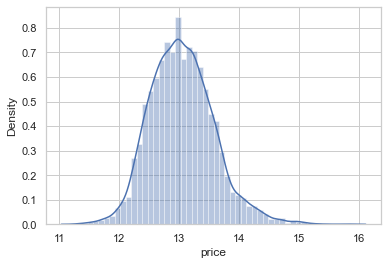

<Figure size 432x288 with 0 Axes>

In [57]:

KC_House_Prices['price'] = np.log(KC_House_Prices['price'])
sns.distplot(KC_House_Prices['price'])
fig = plt.figure()                        # Check the data after teansformation for normailty of data as befor it was skewed.

In [58]:
Target_T = KC_House_Prices['price']
Target_T

0       13.311329
1       14.022525
2       13.056224
3       12.644328
4       12.899220
          ...    
9756    12.969212
9757    13.322337
9758    13.825461
9759    12.904459
9760    12.691580
Name: price, Length: 9760, dtype: float64

# Fitting the Linear Regression

In [59]:
# Here we use all the predictors present.

X = KC_House_Prices_F
y = Target_T
from sklearn.model_selection import train_test_split     # splitting the data into test(20%) and train(80%) 
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

In [60]:
# Fitting the Linear Regression Model with Training Data

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)    # Predicting the target variable on test data

In [61]:
# Evaluating the model with metrics like R squared score , Mean Squared Error , Root Mean Squared Error.

model_score = lr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)   # Finding different metrics like R2 score, MAE, MSE etc.


print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)

Model Score            :  0.7364517183756774
R Square               :  0.7364517183756774
Mean Squared Error     :  0.07582137446977398
Root Mean Squared Error:  0.27535681300773
Median Absolute Error  :  0.17565383997019346


# Insights :

The Performance of the model increased after performing Feature engineering. 

In [62]:
# Intercept and coefficient of our model
# In multi linear regression line we had multiple coefficient as shown in the output below and one Intercept .i.e.., The point at y=0 line cuts the y-axis

print("Intercept of ou model is: ",lr.intercept_)
print("Coefficient of our model is: ",lr.coef_)

Intercept of ou model is:  -80.24604989650639
Coefficient of our model is:  [-4.62374663e-02  9.46530995e-02  5.26385925e-01  8.98868753e-03
  4.17524192e-05 -1.27016704e-01  1.44747071e+00 -1.51500928e-01
  3.18717793e-01 -5.56978960e-02  2.36127312e-03 -4.12277475e-01
 -3.01170093e-01  1.51529371e-01  1.42177015e-01  1.98134939e-01
  2.95695060e-01 -5.42349253e-02  9.71386240e-02  1.42003147e-01
  2.03213807e-01  3.74120321e-01]


# Residual Analysis

Lets see another analysis where error terms should be normally distributed

In [63]:
# y_train_pred is used to predict output on the training data
y_train_pred=lr.predict(X_train)

In [64]:
# Finding residual, to understand difference between fitted value and predicted value
residual=y_train-y_train_pred
pd.DataFrame(residual)

price
1615 -0.317615
5614 -0.298503
3693 -0.034434
7929  0.242475
8630 -0.043652
...        ...
5735 -0.108986
5192  0.010443
5391 -0.514932
860   0.179604
7271 -0.312589

[7808 rows x 1 columns]

Assumption: Error Terms should be normally distributed

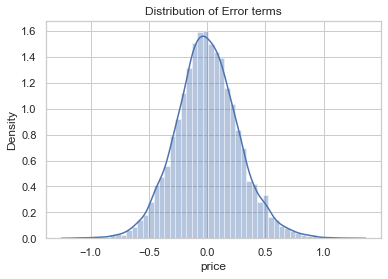

In [65]:
# distplot is used to analyse the distribution of Residual terms

plt.title('Distribution of Error terms')
sns.distplot(residual)
plt.show()

# Inferences:

- We could see that Error terms are normally distributed.

In [66]:
# Import r2_score from sklearn.metrics
from sklearn.metrics import r2_score
# R-Squared score 

r2_score(y_test,y_pred)

0.7364517183756774

# R2 Score on train data

In [67]:
#r2 score on train data
yhat=lr.predict(X_train)                                # yhat is predicted value
RSS=np.sum((yhat-y_train)**2)                           # rss=(yhat-y)**2
TSS=np.sum((np.mean(yhat)-y_train)**2)                  # calculating sum of total squares.
r2=1-(RSS/TSS)                                          # Calculating R2 score using formula.
print(r2)

0.7396693507528569


# R2 Score on Test Data

In [68]:
#r2 score on test data

yhat=lr.predict(X_test)                    # y-hat here is predicted value on test data
RSS=np.sum((yhat-y_test)**2)               # Calculating sum of squared residuals.
TSS=np.sum((np.mean(yhat)-y_test)**2)       # Calculating Total sum of squares
r2=1-(RSS/TSS)                                # Calculating R2 score.
print(r2)

0.7364523453986285


# Adjusted R2 Score on Train Data

In [69]:
# Adjusted r2 on training data

yhat = lr.predict(X_train)                             # y-hat here is predicted value on train data
SumSquaresResidual = np.sum((y_train-yhat)**2)          # Calculating sum of squared residuals.
SumSquaresTotal = np.sum((y_train-np.mean(y_train))**2)  # Calculating Total sum of squares
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)  # Calculating adjusted R2 square
print('The Adjusted R squared is : ', adjusted_r_squared)

The Adjusted R squared is :  0.7389336700484974


# Adjusted R2 Score on Test Data

In [70]:
# Adjusted r2 on test data

yhat = lr.predict(X_test)                              # y-hat here is predicted value on test data
SumSquaresResidual = np.sum((y_test-yhat)**2)
SumSquaresTotal = np.sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('The Adjusted R squared is : ', adjusted_r_squared)

The Adjusted R squared is :  0.7334459836967063


# Inference:
- Adjusted r2 is considered as better metrics in Multiple Linear regression considering that we have obtained 0.7389 in train data
- Adjusted r2 for test datais 0.7334

# Inferences on Overall model Building,evaluation and Prediction:
- Adjusted r2 is good measure for Multiple linear regression,since we have multiple independent variables
- Adjusted r2 on train data is: 0.7389
- Adjusted r2 on test data is 0.7334
- We could see that Error terms are normally distributed with almost/closely mean equal to 0.
- the plot we have drawn on y_test and y_pred shows a good linear relation,which indicates good model perfomance

# Step-5 : Backward Elimination Method

# Stats Model Analysis

In [71]:
# Import stats models library for statistical analysis

import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Created a user defined functin called statsmodel_analysis for further stats analysis.

def statsmodel_analysis(x,y):
    x=sm.add_constant(x)                 # step 1: Add cnstant
    result=sm.OLS(y,x).fit()             # step 2:fit the model
    print(result.summary())  

In [73]:
# Created a user defined functin called checkVIF for checking variance Inflation factor . 
# If variance Inflation factor is more it means that there is a strong multi collonearity among the data.
def MeasureVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [74]:
KC_House_Prices_F

bedrooms  bathrooms  sqft_living   sqft_lot  yr_renovated   zipcode  \
0            4       3.00     7.580700   8.517193             0  0.681818   
1            4       4.50     8.597851  11.532042             0  0.262626   
2            2       1.00     7.056175   8.699515             0  0.575758   
3            3       1.00     7.265430   9.898525             0  0.136364   
4            3       1.75     7.222566   9.177817             0  0.368687   
...        ...        ...          ...        ...           ...       ...   
9756         3       2.00     7.306531   7.026427             0  0.722222   
9757         4       2.50     7.832014   8.703341             0  0.277778   
9758         4       3.50     8.163371   8.881836             0  0.681818   
9759         2       0.75     6.927558   7.207860             0  0.722222   
9760         2       0.75     6.927558   6.981006             0  0.722222   

          lat     long  sqft_living15  sqft_lot15  ...  grade_Medium  view_1  \
0     47.5208 -122.393       7.215240    8.517193  ...             1       0   
1     47.6561 -122.005       8.468003   11.532042  ...             0       0   
2     47.6900 -122.292       7.192934    8.699515  ...             1       0   
3     47.7558 -122.229       7.484369    9.449121  ...             1       0   
4     47.6127 -122.045       7.222566    9.230927  ...             1       0   
...       ...      ...            ...         ...  ...           ...     ...   
9756  47.5699 -122.288       7.244228    7.114769  ...             1       0   
9757  47.5137 -122.167       7.832014    8.703341  ...             1       0   
9758  47.5537 -122.398       7.625595    8.732305  ...             1       0   
9759  47.5944 -122.299       6.927558    7.604396  ...             1       0   
9760  47.5941 -122.299       6.927558    7.213032  ...             1       0   

      view_2  view_3  view_4  condition_2  condition_3  condition_4  \
0          0       0       0            0            0            0   
1          0       0       0            0            1            0   
2          0       0       0            0            0            1   
3          0       0       0            0            0            1   
4          0       0       0            0            0            1   
...      ...     ...     ...          ...          ...          ...   
9756       0       0       0            0            1            0   
9757       0       0       0            0            1            0   
9758       0       0       0            0            1            0   
9759       0       0       0            0            1            0   
9760       0       0       0            0            1            0   

      condition_5  waterfront_1  
0               1             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
9756            0             0  
9757            0             0  
9758            0             0  
9759            0             0  
9760            0             0  

[9760 rows x 22 columns]

In [75]:
Target_T

0       13.311329
1       14.022525
2       13.056224
3       12.644328
4       12.899220
          ...    
9756    12.969212
9757    13.322337
9758    13.825461
9759    12.904459
9760    12.691580
Name: price, Length: 9760, dtype: float64

# Stats Model 1

In [76]:
X = KC_House_Prices_F     # Taking all features as it is a backward elimination process.
y = Target_T
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

In [77]:
# considering all the columns where adjusted r2 is 0.739 which has been noticed by performing model evaluatin using sklearn

x_train_stats1 = X_train
from sklearn.model_selection import train_test_split
statsmodel_analysis(x_train_stats1,y_train)              # Performing statistical analysis.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1005.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        19:30:09   Log-Likelihood:                -878.15
No. Observations:                7808   AIC:                             1802.
Df Residuals:                    7785   BIC:                             1962.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -80.2460      3.842    -20.885

In [78]:
MeasureVIF(x_train_stats1)    # Measuring Variation Inflation Factor

Features        VIF
6             lat  119913.47
7            long  117660.08
2     sqft_living    1503.89
8   sqft_living15    1438.48
9      sqft_lot15     850.41
3        sqft_lot     697.26
18    condition_3     636.68
19    condition_4     267.64
20    condition_5      81.17
0        bedrooms      26.81
1       bathrooms      26.44
12   grade_Medium      17.89
17    condition_2       9.47
10            Age       8.17
5         zipcode       4.18
16         view_4       1.55
21   waterfront_1       1.50
4    yr_renovated       1.19
14         view_2       1.13
15         view_3       1.10
11      grade_Low       1.07
13         view_1       1.05

# Insights:
- As VIF for lat and long is more, there is a strong multicollinearity. So removing 'long' feature.
- Adjusted r2 : 0.739

# Stats Model 2

In [79]:
# Dropping 'long' feature and performing statistical analysis.

x_train_stats2=x_train_stats1.drop(['long'],axis=1)   
statsmodel_analysis(x_train_stats2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        19:30:11   Log-Likelihood:                -891.35
No. Observations:                7808   AIC:                             1827.
Df Residuals:                    7786   BIC:                             1980.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -61.3799      1.123    -54.645

In [80]:
MeasureVIF(x_train_stats2)   # Measuring VIF.

Features      VIF
6             lat  2247.37
2     sqft_living  1503.76
7   sqft_living15  1427.52
8      sqft_lot15   850.40
3        sqft_lot   696.87
17    condition_3   631.41
18    condition_4   265.12
19    condition_5    80.46
0        bedrooms    26.77
1       bathrooms    26.39
11   grade_Medium    17.79
16    condition_2     9.39
9             Age     8.12
5         zipcode     4.16
15         view_4     1.55
20   waterfront_1     1.50
4    yr_renovated     1.19
13         view_2     1.12
14         view_3     1.10
10      grade_Low     1.07
12         view_1     1.05

# Insights:
1. Pvalue for condition_2 is 0.566 lets remove this since its statistically insignificant in our model
2. Adjusted r2 : 0.793

# Stats Model 3

In [81]:
# condition_2 has high p-value greater than 0.05 lets drop this column from our analysis and performing statistical analysis.

# x_train_stats2 dataframe doesn't hold condition_2 column/feature

x_train_stats3=x_train_stats2.drop(['condition_2'],axis=1)
statsmodel_analysis(x_train_stats3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1101.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        19:30:16   Log-Likelihood:                -891.51
No. Observations:                7808   AIC:                             1825.
Df Residuals:                    7787   BIC:                             1971.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -61.4458      1.117    -54.995

In [82]:
MeasureVIF(x_train_stats3)

Features      VIF
2     sqft_living  1503.72
7   sqft_living15  1426.71
6             lat  1351.18
8      sqft_lot15   849.46
3        sqft_lot   696.44
16    condition_3    69.72
17    condition_4    29.43
0        bedrooms    26.76
1       bathrooms    26.39
11   grade_Medium    17.79
18    condition_5     9.61
9             Age     8.12
5         zipcode     4.16
15         view_4     1.55
19   waterfront_1     1.50
4    yr_renovated     1.19
13         view_2     1.12
14         view_3     1.10
10      grade_Low     1.07
12         view_1     1.05

# Insights

1. All the Features has a p-value less than 0.05 (which is threshold). So these features after stats model 3 are final features for fitting to the model.

In [83]:
x_train_stats3

bedrooms  bathrooms  sqft_living  sqft_lot  yr_renovated   zipcode  \
1615         4       2.25     7.630461  9.052516             0  0.166667   
5614         4       3.75     8.289037  8.965462             0  0.368687   
3693         2       1.00     7.122867  8.612503             0  0.590909   
7929         3       1.75     7.306531  8.517193             0  0.681818   
8630         2       2.50     8.064636  9.148465             0  0.025253   
...        ...        ...          ...       ...           ...       ...   
5735         2       1.75     7.414573  9.371353             0  0.777778   
5192         3       1.50     7.286192  9.510667             0  0.045455   
5391         4       2.00     7.489971  9.594922             0  0.994949   
860          2       2.50     7.682482  9.068546             0  0.262626   
7271         3       1.75     7.461640  8.735525             0  0.888889   

          lat  sqft_living15  sqft_lot15  Age  grade_Low  grade_Medium  \
1615  47.7340       7.352441    8.948976   54          0             1   
5614  47.6303       8.289037    9.094930   20          0             0   
3693  47.5257       7.326466    8.612503  100          0             1   
7929  47.5257       7.590852    8.517193   67          0             1   
8630  47.5617       8.232174    9.153770   36          0             0   
...       ...            ...         ...  ...        ...           ...   
5735  47.7661       7.549609    9.895959   40          0             1   
5192  47.3119       7.286192    9.502562   44          0             1   
5391  47.3965       7.799753    9.274629   61          0             1   
860   47.7161       7.682482    8.681011   13          0             1   
7271  47.7620       7.396335    9.038128   67          0             1   

      view_1  view_2  view_3  view_4  condition_3  condition_4  condition_5  \
1615       0       0       0       0            0            1            0   
5614       0       0       0       0            1            0            0   
3693       0       0       0       0            1            0            0   
7929       1       0       0       0            1            0            0   
8630       0       0       0       1            0            0            1   
...      ...     ...     ...     ...          ...          ...          ...   
5735       0       0       0       0            1            0            0   
5192       0       0       0       0            0            1            0   
5391       1       0       0       0            0            1            0   
860        0       0       0       0            1            0            0   
7271       0       0       0       0            0            1            0   

      waterfront_1  
1615             0  
5614             0  
3693             0  
7929             0  
8630             0  
...            ...  
5735             0  
5192             0  
5391             0  
860              0  
7271             0  

[7808 rows x 20 columns]

# Considering New Features which are statistically significant

In [84]:
#x_train_selected features hold the features which are statistically significant 

x_train_selectedfeatures= x_train_stats3
x_train_selectedfeatures

bedrooms  bathrooms  sqft_living  sqft_lot  yr_renovated   zipcode  \
1615         4       2.25     7.630461  9.052516             0  0.166667   
5614         4       3.75     8.289037  8.965462             0  0.368687   
3693         2       1.00     7.122867  8.612503             0  0.590909   
7929         3       1.75     7.306531  8.517193             0  0.681818   
8630         2       2.50     8.064636  9.148465             0  0.025253   
...        ...        ...          ...       ...           ...       ...   
5735         2       1.75     7.414573  9.371353             0  0.777778   
5192         3       1.50     7.286192  9.510667             0  0.045455   
5391         4       2.00     7.489971  9.594922             0  0.994949   
860          2       2.50     7.682482  9.068546             0  0.262626   
7271         3       1.75     7.461640  8.735525             0  0.888889   

          lat  sqft_living15  sqft_lot15  Age  grade_Low  grade_Medium  \
1615  47.7340       7.352441    8.948976   54          0             1   
5614  47.6303       8.289037    9.094930   20          0             0   
3693  47.5257       7.326466    8.612503  100          0             1   
7929  47.5257       7.590852    8.517193   67          0             1   
8630  47.5617       8.232174    9.153770   36          0             0   
...       ...            ...         ...  ...        ...           ...   
5735  47.7661       7.549609    9.895959   40          0             1   
5192  47.3119       7.286192    9.502562   44          0             1   
5391  47.3965       7.799753    9.274629   61          0             1   
860   47.7161       7.682482    8.681011   13          0             1   
7271  47.7620       7.396335    9.038128   67          0             1   

      view_1  view_2  view_3  view_4  condition_3  condition_4  condition_5  \
1615       0       0       0       0            0            1            0   
5614       0       0       0       0            1            0            0   
3693       0       0       0       0            1            0            0   
7929       1       0       0       0            1            0            0   
8630       0       0       0       1            0            0            1   
...      ...     ...     ...     ...          ...          ...          ...   
5735       0       0       0       0            1            0            0   
5192       0       0       0       0            0            1            0   
5391       1       0       0       0            0            1            0   
860        0       0       0       0            1            0            0   
7271       0       0       0       0            0            1            0   

      waterfront_1  
1615             0  
5614             0  
3693             0  
7929             0  
8630             0  
...            ...  
5735             0  
5192             0  
5391             0  
860              0  
7271             0  

[7808 rows x 20 columns]

In [85]:
# selecting features for testing data obtained after statistical analysis

x_testselectedfeatures=X_test.drop(['condition_2','long'],axis=1)
x_testselectedfeatures

bedrooms  bathrooms  sqft_living   sqft_lot  yr_renovated   zipcode  \
4536         3       1.75     7.258412   8.882531             0  0.146465   
8056         4       2.50     7.933797  10.671069             0  0.383838   
360          4       2.00     7.461640   9.104980             0  0.161616   
96           4       2.50     7.922986   8.770284             0  0.373737   
3943         4       2.25     7.811973   9.069468             0  0.287879   
...        ...        ...          ...        ...           ...       ...   
9615         4       2.50     7.385851   8.375169             0  0.207071   
8090         4       2.50     7.901007   9.179881             0  0.050505   
1600         5       3.75     8.347590   9.677778             0  0.373737   
594          4       2.00     7.649693   9.091557             0  0.035354   
5655         2       2.00     7.293018   7.626570             0  0.010101   

          lat  sqft_living15  sqft_lot15  Age  grade_Low  grade_Medium  \
4536  47.3555       7.432484    8.909911   35          0             1   
8056  47.7759       7.919356   10.471355   32          0             1   
360   47.6815       7.522941    8.948976   63          0             1   
96    47.5836       8.029433    9.002947   22          0             0   
3943  47.4371       7.549609    8.902456   47          0             1   
...       ...            ...         ...  ...        ...           ...   
9615  47.3859       7.263330    8.375860   12          0             1   
8090  47.7752       7.811973    9.129998   43          0             1   
1600  47.5869       8.440312    9.712993   17          0             0   
594   47.6115       7.154615    9.116249   63          0             1   
5655  47.3086       7.293018    7.626570   35          0             1   

      view_1  view_2  view_3  view_4  condition_3  condition_4  condition_5  \
4536       0       0       0       0            1            0            0   
8056       0       0       0       0            0            1            0   
360        0       0       0       0            0            0            1   
96         0       0       0       0            1            0            0   
3943       0       0       0       0            0            1            0   
...      ...     ...     ...     ...          ...          ...          ...   
9615       0       0       0       0            1            0            0   
8090       0       0       0       0            1            0            0   
1600       0       0       0       0            1            0            0   
594        0       0       0       0            0            1            0   
5655       0       0       0       0            1            0            0   

      waterfront_1  
4536             0  
8056             0  
360              0  
96               0  
3943             0  
...            ...  
9615             0  
8090             0  
1600             0  
594              0  
5655             0  

[1952 rows x 20 columns]

In [86]:
x_train_selectedfeatures.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_renovated',
       'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'Age', 'grade_Low',
       'grade_Medium', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_3',
       'condition_4', 'condition_5', 'waterfront_1'],
      dtype='object')

# Fitting the Linear Regression Model for the selected features

In [87]:
lr.fit(x_train_selectedfeatures,y_train)

LinearRegression()

# Making predictions on Test data

In [88]:
y_predselectedfeatures=lr.predict(x_testselectedfeatures)
y_predselectedfeatures

array([12.4659029 , 13.54042841, 13.22444362, ..., 13.98074497,
       13.05117206, 12.52371662])

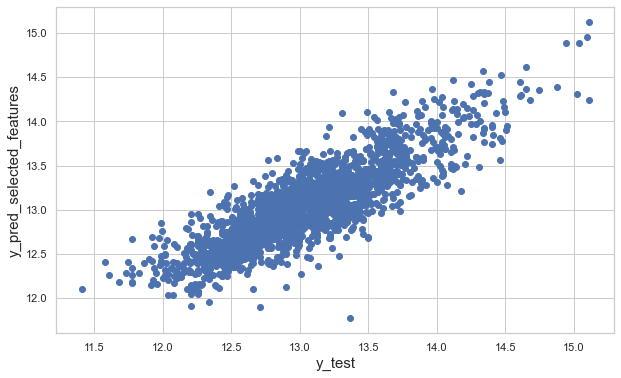

In [89]:
# Plotting y_test and y_pred using sactter plot to understand the spread of the Target variables

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predselectedfeatures)
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred_selected_features', fontsize=15)
plt.show()

# Insights

It can be observed that y_test and y_pred of selected features are linear. So by this we can say that Linear Regression model performed better on Selected Features.

In [90]:
# Adjusted r2 on training data

yhat = lr.predict(x_train_selectedfeatures)                             
SumSquaresResidual = np.sum((y_train-yhat)**2)
SumSquaresTotal = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train_selectedfeatures.shape[1]-1)
print("The R_Squared for Training data is : " ,r_squared)
print("The Adjusted R_Squared for Training data is : ",adjusted_r_squared)

The R_Squared for Training data is :  0.7387769780981713
The Adjusted R_Squared for Training data is :  0.7381060572765408


In [91]:
# Adjusted r2 on test data

yhat = lr.predict(x_testselectedfeatures)                              
SumSquaresResidual = np.sum((y_test-yhat)**2)
SumSquaresTotal = np.sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_testselectedfeatures.shape[1]-1)
print("The R_Squared for Testing data is : " ,r_squared)
print("The Adjusted R_Squared for Testing data is : ",adjusted_r_squared)

The R_Squared for Testing data is :  0.7339391436234015
The Adjusted R_Squared for Testing data is :  0.7311834641166527


# Step-6 :Model Fitting step 3

## Decision Tree Algorithm

**Final Selected Features**

In [92]:
X = KC_House_Prices_F.drop(columns = ['condition_2','long'], axis= 1)
y = Target_T

In [93]:
# Splitting the data into train and test data for sake of decision tree algorithm.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [94]:
# Importing libraries of Decisin Tree Regressor and Confusion Matrix

from sklearn.tree import DecisionTreeRegressor

In [95]:
# Fitting the Decision Tree model  by randomly choosing parameters.

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [96]:
# Predicting the target on tets data

y_pred= model.predict(X_test)
y_pred

array([12.38818585, 13.18053794, 12.98310131, ..., 12.55989352,
       12.77705219, 12.79372041])

In [97]:
# Metrics to evaluate the decision tree model 

model_score = model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  0.7252091070932616
R Square               :  0.7252091070932616
Mean Squared Error     :  0.07951797491864387
Root Mean Squared Error:  0.28198931702928726
Median Absolute Error  :  0.14343808243746636
Explained Variance     :  0.7258260771372841


In [98]:
X.head()

bedrooms  bathrooms  sqft_living   sqft_lot  yr_renovated   zipcode  \
0         4       3.00     7.580700   8.517193             0  0.681818   
1         4       4.50     8.597851  11.532042             0  0.262626   
2         2       1.00     7.056175   8.699515             0  0.575758   
3         3       1.00     7.265430   9.898525             0  0.136364   
4         3       1.75     7.222566   9.177817             0  0.368687   

       lat  sqft_living15  sqft_lot15  Age  grade_Low  grade_Medium  view_1  \
0  47.5208       7.215240    8.517193   56          0             1       0   
1  47.6561       8.468003   11.532042   20          0             0       0   
2  47.6900       7.192934    8.699515   79          0             1       0   
3  47.7558       7.484369    9.449121   94          0             1       0   
4  47.6127       7.222566    9.230927   44          0             1       0   

   view_2  view_3  view_4  condition_3  condition_4  condition_5  waterfront_1  
0       0       0       0            0            0            1             0  
1       0       0       0            1            0            0             0  
2       0       0       0            0            1            0             0  
3       0       0       0            0            1            0             0  
4       0       0       0            0            1            0             0

# K- fold Cross Validation to evaluate the Decision Tree model

In [99]:
#  10 Fold Cross Validation

# https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(DecisionTreeRegressor(), X, y,cv= 10)
Mean_score = scores.mean()
print("The Accuracy of the Model with cross Validation is : " ,Mean_score)

The Accuracy of the Model with cross Validation is :  0.7321765262145801


# Insights

It can be observes that the accuracy of the model increased when cross validation is performed. So Hyper Parameter Tuning has to be performed.

# Hyper Parameter Tuning for Decision Tree Model

In [100]:
# Creating parameters for tuning purpose

parameters = { 'max_depth' :(10,30,50,70,90,100),
              'criterion' : ("mse", "friedman_mse", "mae"),
               'max_depth' :(3,5,7,9,10),
               'max_features' : ('auto','sqrt','log2'),
               'min_samples_split' : (2,4,6)
              }

In [101]:
# Importing the RandomizedSearchCV package for hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Applying the RandomizedSearchCV for decision tree model with 10 fold cross validation.

grid = RandomizedSearchCV(model, param_distributions = parameters ,cv=10) 

In [102]:
# Fitting the training data.

grid.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ('mse', 'friedman_mse',
                                                      'mae'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)})

In [103]:
# Getting the best estimators.

grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_split=6)

In [104]:
# Fitting the Decision Tree model  by randomly choosing parameters after tuning.

model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_leaf=20,
                      min_samples_split=6)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_leaf=20,
                      min_samples_split=6)

In [105]:
# Predicting the target on tets data

y_pred= model.predict(X_test)
y_pred

array([12.29784486, 13.12227103, 12.9674923 , ..., 12.55715542,
       12.9839605 , 12.73189884])

In [106]:
# Metrics to evaluate the decision tree model 

model_score = model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  0.8032330197677283
R Square               :  0.8032330197677283
Root Mean Squared Error:  0.2386204159115061
Median Absolute Error  :  0.12943896261610277
Explained Variance     :  0.8035420421075239


# Insights 
After fitting the model with data using hyper parameters the R2 score of the model has increased.

# Step-7 : Model Testing

Testing the Best models with Test Data given

In [125]:
# Importing and reading the Test Data

os.chdir(r"C:/Users/neha/Desktop/Project dataset")
KC_House_Prices_test = pd.read_csv('wk3_kc_house_test_data.csv')
KC_House_Prices_test.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  3793500160  20150312T000000  323000.0         3       2.50         1890   
1  1175000570  20150312T000000  530000.0         5       2.00         1810   
2    16000397  20141205T000000  189000.0         2       1.00         1200   
3   461000390  20140624T000000  687500.0         4       1.75         2330   
4  7895500070  20150213T000000  240000.0         4       1.00         1220   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6560     2.0           0     0  ...      7        1890              0   
1      4850     1.5           0     0  ...      7        1810              0   
2      9850     1.0           0     0  ...      7        1200              0   
3      5000     1.5           0     0  ...      7        1510            820   
4      8075     1.0           0     0  ...      7         890            330   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2003             0    98038  47.3684 -122.031           2390   
1      1900             0    98107  47.6700 -122.394           1360   
2      1921             0    98002  47.3089 -122.210           1060   
3      1929             0    98117  47.6823 -122.368           1460   
4      1969             0    98001  47.3341 -122.282           1290   

   sqft_lot15  
0        7570  
1        4850  
2        5095  
3        5000  
4        7800  

[5 rows x 21 columns]

In [126]:
# Checking the shape of the data

KC_House_Prices_test.shape

(2217, 21)

In [127]:
# From the above data we can remove the ID and Date columns because in general the ID column doesn't effect the price of the house much
# and also the date of sale also doesn't effect much, but only the year of built effect, so dropping ID and date columns

# Droping the ID column and DAte columns

KC_House_Prices_test = KC_House_Prices_test.drop(columns = ['id','date'])
KC_House_Prices_test.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  323000.0         3       2.50         1890      6560     2.0           0   
1  530000.0         5       2.00         1810      4850     1.5           0   
2  189000.0         2       1.00         1200      9850     1.0           0   
3  687500.0         4       1.75         2330      5000     1.5           0   
4  240000.0         4       1.00         1220      8075     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1890              0      2003             0   
1     0          3      7        1810              0      1900             0   
2     0          4      7        1200              0      1921             0   
3     0          4      7        1510            820      1929             0   
4     0          2      7         890            330      1969             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98038  47.3684 -122.031           2390        7570  
1    98107  47.6700 -122.394           1360        4850  
2    98002  47.3089 -122.210           1060        5095  
3    98117  47.6823 -122.368           1460        5000  
4    98001  47.3341 -122.282           1290        7800

In [128]:
# Finding the Summary of Data  like mean, median,standard deviation etc.
KC_House_Prices_test.describe().transpose()

count           mean            std         min          25%  \
price          2217.0  538724.241768  358635.061725  83000.0000  320000.0000   
bedrooms       2217.0       3.353631       0.867263      1.0000       3.0000   
bathrooms      2217.0       2.099008       0.757563      0.5000       1.5000   
sqft_living    2217.0    2073.439783     897.054209    420.0000    1460.0000   
sqft_lot       2217.0   13554.643212   29606.430361    683.0000    5000.0000   
floors         2217.0       1.496166       0.543553      1.0000       1.0000   
waterfront     2217.0       0.005864       0.076368      0.0000       0.0000   
view           2217.0       0.227334       0.755074      0.0000       0.0000   
condition      2217.0       3.412720       0.665472      1.0000       3.0000   
grade          2217.0       7.648173       1.150964      4.0000       7.0000   
sqft_above     2217.0    1791.431213     836.477490    420.0000    1200.0000   
sqft_basement  2217.0     282.008570     423.914803      0.0000       0.0000   
yr_built       2217.0    1971.046459      29.505233   1900.0000    1951.0000   
yr_renovated   2217.0      86.330627     405.893265      0.0000       0.0000   
zipcode        2217.0   98079.107352      52.951950  98001.0000   98033.0000   
lat            2217.0      47.557274       0.136144     47.1942      47.4698   
long           2217.0    -122.215217       0.140791   -122.5110    -122.3290   
sqft_living15  2217.0    1985.875056     686.149119    399.0000    1490.0000   
sqft_lot15     2217.0   12147.815065   22904.986531    755.0000    5078.0000   

                      50%          75%           max  
price          450000.000  635000.0000  3.850000e+06  
bedrooms            3.000       4.0000  9.000000e+00  
bathrooms           2.250       2.5000  6.000000e+00  
sqft_living      1910.000    2490.0000  7.850000e+03  
sqft_lot         7526.000   10464.0000  4.356000e+05  
floors              1.500       2.0000  3.500000e+00  
waterfront          0.000       0.0000  1.000000e+00  
view                0.000       0.0000  4.000000e+00  
condition           3.000       4.0000  5.000000e+00  
grade               7.000       8.0000  1.200000e+01  
sqft_above       1560.000    2220.0000  7.850000e+03  
sqft_basement       0.000     540.0000  2.570000e+03  
yr_built         1975.000    1997.0000  2.015000e+03  
yr_renovated        0.000       0.0000  2.015000e+03  
zipcode         98070.000   98118.0000  9.819900e+04  
lat                47.567      47.6745  4.777750e+01  
long             -122.235    -122.1270 -1.213520e+02  
sqft_living15    1830.000    2370.0000  6.210000e+03  
sqft_lot15       7551.000   10000.0000  2.926450e+05

In [129]:
# Checking for Null Values
pd.DataFrame(KC_House_Prices_test.isnull().sum())

# The data has no null values

0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
sqft_above     0
sqft_basement  0
yr_built       0
yr_renovated   0
zipcode        0
lat            0
long           0
sqft_living15  0
sqft_lot15     0

In [130]:
# Checking for Duplicate data

duplicates = KC_House_Prices_test.duplicated()
duplicates.sum()

# There are no duplicates present in this data

0

# Converting View, waterfront, condition, grade to data type object.


In [131]:
# Converting datatype into datatype:object where column is mentioned as int but actually they are categorical in nature.

KC_House_Prices_test['view']=KC_House_Prices_test['view'].astype('object')

KC_House_Prices_test['waterfront']=KC_House_Prices_test['waterfront'].astype('object')

KC_House_Prices_test['condition']=KC_House_Prices_test['condition'].astype('object')

KC_House_Prices_test['grade']=KC_House_Prices_test['grade'].astype('object')

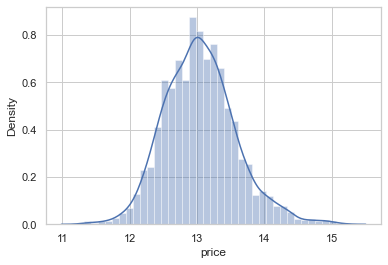

<Figure size 432x288 with 0 Axes>

In [132]:
# Applying Log Transformation to Price column

KC_House_Prices_test['price'] = np.log(KC_House_Prices_test['price'])
sns.distplot(KC_House_Prices_test['price'])
fig = plt.figure()

# Applying Log transformation to sqft_living, sqft_above, sqft_living15 etc.

In [133]:
# Applying Log transformation to handle outliers
KC_House_Prices_test['sqft_living'] = np.log(KC_House_Prices_test['sqft_living'])
KC_House_Prices_test['sqft_above'] = np.log(KC_House_Prices_test['sqft_above'])
KC_House_Prices_test['sqft_living15'] = np.log(KC_House_Prices_test['sqft_living15'])
KC_House_Prices_test['sqft_lot15'] = np.log(KC_House_Prices_test['sqft_lot15'])
KC_House_Prices_test['sqft_basement'] = np.log(KC_House_Prices_test['sqft_basement'])
KC_House_Prices_test['sqft_lot'] = np.log(KC_House_Prices_test['sqft_basement'])

In [134]:
KC_House_Prices_test.describe().transpose()

count          mean         std           min           25%  \
price          2217.0  1.304490e+01    0.529038  1.132660e+01     12.676076   
bedrooms       2217.0  3.353631e+00    0.867263  1.000000e+00      3.000000   
bathrooms      2217.0  2.099008e+00    0.757563  5.000000e-01      1.500000   
sqft_living    2217.0  7.550438e+00    0.416671  6.040255e+00      7.286192   
sqft_lot        871.0  1.853837e+00    0.102059  1.305323e+00      1.806118   
floors         2217.0  1.496166e+00    0.543553  1.000000e+00      1.000000   
sqft_above     2217.0  7.396155e+00    0.427725  6.040255e+00      7.090077   
sqft_basement  2217.0          -inf         NaN          -inf           NaN   
yr_built       2217.0  1.971046e+03   29.505233  1.900000e+03   1951.000000   
yr_renovated   2217.0  8.633063e+01  405.893265  0.000000e+00      0.000000   
zipcode        2217.0  9.807911e+04   52.951950  9.800100e+04  98033.000000   
lat            2217.0  4.755727e+01    0.136144  4.719420e+01     47.469800   
long           2217.0 -1.222152e+02    0.140791 -1.225110e+02   -122.329000   
sqft_living15  2217.0  7.539320e+00    0.326816  5.988961e+00      7.306531   
sqft_lot15     2217.0  8.951900e+00    0.791445  6.626718e+00      8.532673   

                        50%           75%           max  
price             13.017003     13.361380     15.163584  
bedrooms           3.000000      4.000000      9.000000  
bathrooms          2.250000      2.500000      6.000000  
sqft_living        7.554859      7.820038      8.968269  
sqft_lot           1.877431      1.923647      2.060725  
floors             1.500000      2.000000      3.500000  
sqft_above         7.352441      7.705262      8.968269  
sqft_basement           NaN      6.291569      7.851661  
yr_built        1975.000000   1997.000000   2015.000000  
yr_renovated       0.000000      0.000000   2015.000000  
zipcode        98070.000000  98118.000000  98199.000000  
lat               47.567000     47.674500     47.777500  
long            -122.235000   -122.127000   -121.352000  
sqft_living15      7.512071      7.770645      8.733916  
sqft_lot15         8.929435      9.210340     12.586716

In [135]:
# Definig Target Variable
Target_Test = KC_House_Prices_test.price
pd.DataFrame(Target_Test)
Target_Test.shape

(2217,)

# Bining Grade Column by applying the Predifined Function.

In [136]:
# Bining Grade Column bt applying the Predifined Function

KC_House_Prices_test['grade'] = KC_House_Prices_test['grade'].apply(func_grade)

KC_House_Prices_test.head(10)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  12.685408         3       2.50     7.544332       NaN     2.0          0   
1  13.180632         5       2.00     7.501082       NaN     1.5          0   
2  12.149502         2       1.00     7.090077       NaN     1.0          0   
3  13.440817         4       1.75     7.753624  1.903495     1.5          0   
4  12.388394         4       1.00     7.106606  1.757701     1.0          0   
5  13.279367         2       1.75     7.590852  1.931189     1.0          0   
6  12.959844         3       2.25     7.414573  1.842123     1.0          0   
7  13.458764         3       2.25     7.691657       NaN     2.0          0   
8  12.834681         3       2.50     7.757906  1.913966     1.0          0   
9  12.232836         2       1.00     6.779922       NaN     1.0          0   

  view condition   grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    0         3  Medium    7.544332           -inf      2003             0   
1    0         3  Medium    7.501082           -inf      1900             0   
2    0         4  Medium    7.090077           -inf      1921             0   
3    0         4  Medium    7.319865       6.709304      1929             0   
4    0         2  Medium    6.791221       5.799093      1969             0   
5    0         3  Medium    6.897705       6.897705      1981             0   
6    0         3  Medium    7.012115       6.309918      1979             0   
7    0         4  Medium    7.691657           -inf      1983             0   
8    0         4  Medium    7.286192       6.779922      1978             0   
9    0         4  Medium    6.779922           -inf      1945             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98038  47.3684 -122.031       7.779049    8.931948  
1    98107  47.6700 -122.394       7.215240    8.486734  
2    98002  47.3089 -122.210       6.966024    8.536015  
3    98117  47.6823 -122.368       7.286192    8.517193  
4    98001  47.3341 -122.282       7.162397    8.961879  
5    98117  47.6989 -122.369       7.299797    8.815518  
6    98122  47.6113 -122.297       7.272398    8.313852  
7    98077  47.7731 -122.080       7.851661   10.774300  
8    98058  47.4431 -122.133       7.718685    9.007245  
9    98178  47.5009 -122.248       7.081709    8.821732

In [137]:
# Appplying MinMax scaling which scales the value between 0 and 1

KC_House_Prices_test[['zipcode']]= mm.fit_transform(KC_House_Prices_test[['zipcode']])
KC_House_Prices_test.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  12.685408         3       2.50     7.544332       NaN     2.0          0   
1  13.180632         5       2.00     7.501082       NaN     1.5          0   
2  12.149502         2       1.00     7.090077       NaN     1.0          0   
3  13.440817         4       1.75     7.753624  1.903495     1.5          0   
4  12.388394         4       1.00     7.106606  1.757701     1.0          0   

  view condition   grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    0         3  Medium    7.544332           -inf      2003             0   
1    0         3  Medium    7.501082           -inf      1900             0   
2    0         4  Medium    7.090077           -inf      1921             0   
3    0         4  Medium    7.319865       6.709304      1929             0   
4    0         2  Medium    6.791221       5.799093      1969             0   

    zipcode      lat     long  sqft_living15  sqft_lot15  
0  0.186869  47.3684 -122.031       7.779049    8.931948  
1  0.535354  47.6700 -122.394       7.215240    8.486734  
2  0.005051  47.3089 -122.210       6.966024    8.536015  
3  0.585859  47.6823 -122.368       7.286192    8.517193  
4  0.000000  47.3341 -122.282       7.162397    8.961879

In [138]:
# Creating Age column from yr_built column

KC_House_Prices_test['Age']= 2021 - KC_House_Prices_test['yr_built']
KC_House_Prices_test

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     12.685408         3       2.50     7.544332       NaN     2.0   
1     13.180632         5       2.00     7.501082       NaN     1.5   
2     12.149502         2       1.00     7.090077       NaN     1.0   
3     13.440817         4       1.75     7.753624  1.903495     1.5   
4     12.388394         4       1.00     7.106606  1.757701     1.0   
...         ...       ...        ...          ...       ...     ...   
2212  12.911642         4       2.50     7.590852       NaN     2.0   
2213  12.868761         3       2.50     7.695303       NaN     2.0   
2214  13.318752         4       3.50     7.955074  1.917275     2.0   
2215  12.345835         3       1.75     7.038784       NaN     2.0   
2216  12.934828         2       1.50     7.098376  1.657661     2.0   

     waterfront view condition   grade  sqft_above  sqft_basement  yr_built  \
0             0    0         3  Medium    7.544332           -inf      2003   
1             0    0         3  Medium    7.501082           -inf      1900   
2             0    0         4  Medium    7.090077           -inf      1921   
3             0    0         4  Medium    7.319865       6.709304      1929   
4             0    0         2  Medium    6.791221       5.799093      1969   
...         ...  ...       ...     ...         ...            ...       ...   
2212          0    0         3  Medium    7.590852           -inf      2007   
2213          0    2         3  Medium    7.695303           -inf      2010   
2214          0    0         3  Medium    7.575585       6.802395      2014   
2215          0    0         3  Medium    7.038784           -inf      2014   
2216          0    0         3  Medium    6.927558       5.247024      2007   

      yr_renovated   zipcode      lat     long  sqft_living15  sqft_lot15  Age  
0                0  0.186869  47.3684 -122.031       7.779049    8.931948   18  
1                0  0.535354  47.6700 -122.394       7.215240    8.486734  121  
2                0  0.005051  47.3089 -122.210       6.966024    8.536015  100  
3                0  0.585859  47.6823 -122.368       7.286192    8.517193   92  
4                0  0.000000  47.3341 -122.282       7.162397    8.961879   52  
...            ...       ...      ...      ...            ...         ...  ...  
2212             0  0.277778  47.5147 -122.190       7.590852    8.529912   14  
2213             0  0.994949  47.3906 -122.304       7.695303    8.938663   11  
2214             0  0.277778  47.5252 -122.192       7.955074    8.649624    7  
2215             0  0.540404  47.5637 -122.295       7.098376    7.347300    7  
2216             0  0.585859  47.6756 -122.375       7.098376    7.019297   14  

[2217 rows x 20 columns]

In [139]:
# Dropping yr_built column

KC_House_Prices_test= KC_House_Prices_test.drop(columns='yr_built')
KC_House_Prices_test

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     12.685408         3       2.50     7.544332       NaN     2.0   
1     13.180632         5       2.00     7.501082       NaN     1.5   
2     12.149502         2       1.00     7.090077       NaN     1.0   
3     13.440817         4       1.75     7.753624  1.903495     1.5   
4     12.388394         4       1.00     7.106606  1.757701     1.0   
...         ...       ...        ...          ...       ...     ...   
2212  12.911642         4       2.50     7.590852       NaN     2.0   
2213  12.868761         3       2.50     7.695303       NaN     2.0   
2214  13.318752         4       3.50     7.955074  1.917275     2.0   
2215  12.345835         3       1.75     7.038784       NaN     2.0   
2216  12.934828         2       1.50     7.098376  1.657661     2.0   

     waterfront view condition   grade  sqft_above  sqft_basement  \
0             0    0         3  Medium    7.544332           -inf   
1             0    0         3  Medium    7.501082           -inf   
2             0    0         4  Medium    7.090077           -inf   
3             0    0         4  Medium    7.319865       6.709304   
4             0    0         2  Medium    6.791221       5.799093   
...         ...  ...       ...     ...         ...            ...   
2212          0    0         3  Medium    7.590852           -inf   
2213          0    2         3  Medium    7.695303           -inf   
2214          0    0         3  Medium    7.575585       6.802395   
2215          0    0         3  Medium    7.038784           -inf   
2216          0    0         3  Medium    6.927558       5.247024   

      yr_renovated   zipcode      lat     long  sqft_living15  sqft_lot15  Age  
0                0  0.186869  47.3684 -122.031       7.779049    8.931948   18  
1                0  0.535354  47.6700 -122.394       7.215240    8.486734  121  
2                0  0.005051  47.3089 -122.210       6.966024    8.536015  100  
3                0  0.585859  47.6823 -122.368       7.286192    8.517193   92  
4                0  0.000000  47.3341 -122.282       7.162397    8.961879   52  
...            ...       ...      ...      ...            ...         ...  ...  
2212             0  0.277778  47.5147 -122.190       7.590852    8.529912   14  
2213             0  0.994949  47.3906 -122.304       7.695303    8.938663   11  
2214             0  0.277778  47.5252 -122.192       7.955074    8.649624    7  
2215             0  0.540404  47.5637 -122.295       7.098376    7.347300    7  
2216             0  0.585859  47.6756 -122.375       7.098376    7.019297   14  

[2217 rows x 19 columns]

In [140]:
KC_House_Prices_test.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  12.685408         3       2.50     7.544332       NaN     2.0          0   
1  13.180632         5       2.00     7.501082       NaN     1.5          0   
2  12.149502         2       1.00     7.090077       NaN     1.0          0   
3  13.440817         4       1.75     7.753624  1.903495     1.5          0   
4  12.388394         4       1.00     7.106606  1.757701     1.0          0   

  view condition   grade  sqft_above  sqft_basement  yr_renovated   zipcode  \
0    0         3  Medium    7.544332           -inf             0  0.186869   
1    0         3  Medium    7.501082           -inf             0  0.535354   
2    0         4  Medium    7.090077           -inf             0  0.005051   
3    0         4  Medium    7.319865       6.709304             0  0.585859   
4    0         2  Medium    6.791221       5.799093             0  0.000000   

       lat     long  sqft_living15  sqft_lot15  Age  
0  47.3684 -122.031       7.779049    8.931948   18  
1  47.6700 -122.394       7.215240    8.486734  121  
2  47.3089 -122.210       6.966024    8.536015  100  
3  47.6823 -122.368       7.286192    8.517193   92  
4  47.3341 -122.282       7.162397    8.961879   52

In [141]:
# Dropping sqft_basement

KC_House_Prices_test = KC_House_Prices_test.drop(columns= ['sqft_basement'])

In [142]:
# Feature Transforming all the Categorical Columns

# we are using pandas inbuilt method which is get_dummies() method to treat the categorical column.

Categorical_cloumns = KC_House_Prices_test[['grade','view','condition','waterfront']]
Categorical_cloumns = pd.get_dummies(Categorical_cloumns, drop_first= True )
Categorical_cloumns

grade_Low  grade_Medium  view_1  view_2  view_3  view_4  condition_2  \
0             0             1       0       0       0       0            0   
1             0             1       0       0       0       0            0   
2             0             1       0       0       0       0            0   
3             0             1       0       0       0       0            0   
4             0             1       0       0       0       0            1   
...         ...           ...     ...     ...     ...     ...          ...   
2212          0             1       0       0       0       0            0   
2213          0             1       0       1       0       0            0   
2214          0             1       0       0       0       0            0   
2215          0             1       0       0       0       0            0   
2216          0             1       0       0       0       0            0   

      condition_3  condition_4  condition_5  waterfront_1  
0               1            0            0             0  
1               1            0            0             0  
2               0            1            0             0  
3               0            1            0             0  
4               0            0            0             0  
...           ...          ...          ...           ...  
2212            1            0            0             0  
2213            1            0            0             0  
2214            1            0            0             0  
2215            1            0            0             0  
2216            1            0            0             0  

[2217 rows x 11 columns]

In [143]:
# Deleting the categorical columns from KC_House_Prices_test data frame and concatinating the transformed variables again

KC_House_Prices_test_F = KC_House_Prices_test[['bedrooms','bathrooms','sqft_living','sqft_lot','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Age']]
KC_House_Prices_test_F

bedrooms  bathrooms  sqft_living  sqft_lot  yr_renovated   zipcode  \
0            3       2.50     7.544332       NaN             0  0.186869   
1            5       2.00     7.501082       NaN             0  0.535354   
2            2       1.00     7.090077       NaN             0  0.005051   
3            4       1.75     7.753624  1.903495             0  0.585859   
4            4       1.00     7.106606  1.757701             0  0.000000   
...        ...        ...          ...       ...           ...       ...   
2212         4       2.50     7.590852       NaN             0  0.277778   
2213         3       2.50     7.695303       NaN             0  0.994949   
2214         4       3.50     7.955074  1.917275             0  0.277778   
2215         3       1.75     7.038784       NaN             0  0.540404   
2216         2       1.50     7.098376  1.657661             0  0.585859   

          lat     long  sqft_living15  sqft_lot15  Age  
0     47.3684 -122.031       7.779049    8.931948   18  
1     47.6700 -122.394       7.215240    8.486734  121  
2     47.3089 -122.210       6.966024    8.536015  100  
3     47.6823 -122.368       7.286192    8.517193   92  
4     47.3341 -122.282       7.162397    8.961879   52  
...       ...      ...            ...         ...  ...  
2212  47.5147 -122.190       7.590852    8.529912   14  
2213  47.3906 -122.304       7.695303    8.938663   11  
2214  47.5252 -122.192       7.955074    8.649624    7  
2215  47.5637 -122.295       7.098376    7.347300    7  
2216  47.6756 -122.375       7.098376    7.019297   14  

[2217 rows x 11 columns]

In [144]:
# Concatinating both Numerical and Categorical Columns for final Predictors

KC_House_Prices_test_Final = pd.concat([KC_House_Prices_test_F, Categorical_cloumns], axis= 1)
KC_House_Prices_test_Final

bedrooms  bathrooms  sqft_living  sqft_lot  yr_renovated   zipcode  \
0            3       2.50     7.544332       NaN             0  0.186869   
1            5       2.00     7.501082       NaN             0  0.535354   
2            2       1.00     7.090077       NaN             0  0.005051   
3            4       1.75     7.753624  1.903495             0  0.585859   
4            4       1.00     7.106606  1.757701             0  0.000000   
...        ...        ...          ...       ...           ...       ...   
2212         4       2.50     7.590852       NaN             0  0.277778   
2213         3       2.50     7.695303       NaN             0  0.994949   
2214         4       3.50     7.955074  1.917275             0  0.277778   
2215         3       1.75     7.038784       NaN             0  0.540404   
2216         2       1.50     7.098376  1.657661             0  0.585859   

          lat     long  sqft_living15  sqft_lot15  ...  grade_Medium  view_1  \
0     47.3684 -122.031       7.779049    8.931948  ...             1       0   
1     47.6700 -122.394       7.215240    8.486734  ...             1       0   
2     47.3089 -122.210       6.966024    8.536015  ...             1       0   
3     47.6823 -122.368       7.286192    8.517193  ...             1       0   
4     47.3341 -122.282       7.162397    8.961879  ...             1       0   
...       ...      ...            ...         ...  ...           ...     ...   
2212  47.5147 -122.190       7.590852    8.529912  ...             1       0   
2213  47.3906 -122.304       7.695303    8.938663  ...             1       0   
2214  47.5252 -122.192       7.955074    8.649624  ...             1       0   
2215  47.5637 -122.295       7.098376    7.347300  ...             1       0   
2216  47.6756 -122.375       7.098376    7.019297  ...             1       0   

      view_2  view_3  view_4  condition_2  condition_3  condition_4  \
0          0       0       0            0            1            0   
1          0       0       0            0            1            0   
2          0       0       0            0            0            1   
3          0       0       0            0            0            1   
4          0       0       0            1            0            0   
...      ...     ...     ...          ...          ...          ...   
2212       0       0       0            0            1            0   
2213       1       0       0            0            1            0   
2214       0       0       0            0            1            0   
2215       0       0       0            0            1            0   
2216       0       0       0            0            1            0   

      condition_5  waterfront_1  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
2212            0             0  
2213            0             0  
2214            0             0  
2215            0             0  
2216            0             0  

[2217 rows x 22 columns]

In [145]:
# Ass NaN values are present in sqft_lot it is better to drop the column
KC_House_Prices_test_Final = KC_House_Prices_test_Final.drop(columns= ['sqft_lot'])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'Age',
       'grade_Low', 'grade_Medium', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_2', 'condition_4', 'condition_5', 'waterfront_1'],
      dtype='object')

# Considering New Features which are Statistically Significant

In [146]:
# Final_Selected_Features features hold the features which are statistically significant 

Final_Selected_Features = KC_House_Prices_test_Final[['bedrooms', 'bathrooms', 'sqft_living',
       'yr_renovated', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15', 'Age',
       'grade_Low', 'grade_Medium', 'view_1', 'view_2', 'view_3','view_4','condition_3',
       'condition_4', 'condition_5', 'waterfront_1']]
Final_Selected_Features.head()

bedrooms  bathrooms  sqft_living  yr_renovated   zipcode      lat  \
0         3       2.50     7.544332             0  0.186869  47.3684   
1         5       2.00     7.501082             0  0.535354  47.6700   
2         2       1.00     7.090077             0  0.005051  47.3089   
3         4       1.75     7.753624             0  0.585859  47.6823   
4         4       1.00     7.106606             0  0.000000  47.3341   

   sqft_living15  sqft_lot15  Age  grade_Low  grade_Medium  view_1  view_2  \
0       7.779049    8.931948   18          0             1       0       0   
1       7.215240    8.486734  121          0             1       0       0   
2       6.966024    8.536015  100          0             1       0       0   
3       7.286192    8.517193   92          0             1       0       0   
4       7.162397    8.961879   52          0             1       0       0   

   view_3  view_4  condition_3  condition_4  condition_5  waterfront_1  
0       0       0            1            0            0             0  
1       0       0            1            0            0             0  
2       0       0            0            1            0             0  
3       0       0            0            1            0             0  
4       0       0            0            0            0             0

In [147]:
# Final Selected Target

Final_Selected_Target = KC_House_Prices_test.price
Final_Selected_Target.head()

0    12.685408
1    13.180632
2    12.149502
3    13.440817
4    12.388394
Name: price, dtype: float64

In [148]:
Final_Selected_Target.shape

(2217,)

In [149]:
y = Target_T   # Target of the Train data

In [150]:
X = KC_House_Prices_F.drop(columns = ['condition_2','long','sqft_lot'], axis= 1)  # Predictors of Train data.

In [151]:
# Definig the Test and Train Data

X_train = X        # Training Data (wk3_kc_house_train_data.csv file)
y_train = y        # Training Data (wk3_kc_house_train_data.csv file)
X_test = Final_Selected_Features   # Testing Data (wk3_kc_house_test_data.csv file)
y_test = Final_Selected_Target     # Testing Data (wk3_kc_house_test_data.csv file)

# Linear Regression Model

In [152]:
# Fitting the Linear Regression Model with Training Data

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the target variable with linear regression model

y_pred = lr.predict(X_test)

In [153]:
pd.DataFrame(y_pred)

0
0     12.763455
1     13.124437
2     12.363772
3     13.276729
4     12.079879
...         ...
2212  12.907160
2213  12.905957
2214  13.292926
2215  12.527062
2216  12.764609

[2217 rows x 1 columns]

In [154]:
# Evaluating the model with metrics like R squared score , Mean Squared Error , Root Mean Squared Error.

model_score = lr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)


print("Model Score            : ", model_score)
print("R Square               : ", r_square)               # R2 score = 0.734
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)

Model Score            :  0.7349187535643783
R Square               :  0.7349187535643783
Mean Squared Error     :  0.07415767518763373
Root Mean Squared Error:  0.2723190687183579
Median Absolute Error  :  0.1688966381604775


In [155]:
# Adjusted r2 on test data

yhat = lr.predict(X_test)                              
SumSquaresResidual = np.sum((y_test-yhat)**2)
SumSquaresTotal = np.sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_testselectedfeatures.shape[1]-1)
print("The R_Squared for Testing data is : " ,r_squared)
print("The Adjusted R_Squared for Testing data is : ",adjusted_r_squared)

The R_Squared for Testing data is :  0.7349187535643783
The Adjusted R_Squared for Testing data is :  0.7325045345622323


# Inference 
The Adjusted R2 score on test data is 0.73 which means model has performed well.

# Decision Tree with Hyper Parameters

In [156]:
# Fitting the Decision Tree model  by randomly choosing parameters after tuning.

model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=6)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=6)

In [157]:
# Predicting the target on tets data

y_pred= model.predict(X_test)
y_pred

array([12.62981234, 13.32248386, 12.18240499, ..., 13.33432274,
       12.72407856, 13.07953441])

In [158]:
# Metrics to evaluate the decision tree model 

model_score = model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  0.7968825353356732
R Square               :  0.7968825353356732
Root Mean Squared Error:  0.2383758115899793
Median Absolute Error  :  0.12721262481883677
Explained Variance     :  0.7968835127218843


In [159]:
# Adjusted r2 on test data

yhat = model.predict(X_test)                              # y-hat here is predicted value on test data
SumSquaresResidual = np.sum((y_test-yhat)**2)
SumSquaresTotal = np.sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The R_Squared for Testing data is : " ,r_squared)
print("The Adjusted R_Squared for Testing data is : ",adjusted_r_squared)

The R_Squared for Testing data is :  0.7968825353356732
The Adjusted R_Squared for Testing data is :  0.7951259436977023


# Inference :
The Adjusted R2 score on test data is 0.79 which means model has performed well.